In [94]:
import pandas as pd
import numpy as np
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [95]:
username = os.environ.get("USERNAME")
data_path = f"./{username}_data"
prefix = f"{username}_"

In [96]:
song_data = pd.read_csv(f'{data_path}/{prefix}history_with_features')

In [97]:
song_data.dtypes

endTime              object
artistName           object
trackName            object
msPlayed              int64
id                   object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [192]:
#the only information that is easy to understand/predict are the numerical columns, so only take those columns.
expect = []
inputs = []
input_cols = ["msPlayed","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]
important_data = song_data[input_cols].copy()

In [100]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Data Preprocessing
---
In order to get the data ready to go into a machine learning model, we first have to transform it. Because all of the input columns are already numeric, no one hot encoding or other transformation technique is necessary.

In [193]:
#to get the rest of the data between 0 and 1, use MinMaxScaler on it
scaler = MinMaxScaler()
scaler.fit(important_data)
scaled_data = pd.DataFrame(scaler.transform(important_data), columns=important_data.columns)

In [194]:
scaled_data

msPlayed  danceability    energy  loudness  speechiness  acousticness  \
0      0.010700      0.532854  0.899998  0.897489     0.051688      0.012650   
1      0.101559      0.320329  0.613992  0.868372     0.049156      0.059135   
2      0.063700      0.755647  0.592992  0.813125     0.039873      0.015160   
3      0.085876      0.794661  0.749995  0.895522     0.043460      0.002077   
4      0.106974      0.393224  0.835997  0.868064     0.041034      0.038854   
...         ...           ...       ...       ...          ...           ...   
16976  0.091608      0.813142  0.624992  0.879365     0.056540      0.007790   
16977  0.088864      0.514374  0.932999  0.929898     0.208861      0.045882   
16978  0.011189      0.510267  0.922998  0.905354     0.145570      0.002830   
16979  0.009274      0.905544  0.661993  0.861052     0.255274      0.012449   
16980  0.022980      0.905544  0.661993  0.861052     0.255274      0.012449   

       instrumentalness  liveness   valence     tempo  
0              0.000055  0.089236  0.606742  0.553117  
1              0.000000  0.075744  0.363636  0.946648  
2              0.000001  0.041398  0.625128  0.562313  
3              0.000018  0.066544  0.946885  0.543963  
4              0.000107  0.104569  0.479060  0.493330  
...                 ...       ...       ...       ...  
16976          0.001800  0.320249  0.377937  0.479212  
16977          0.000000  0.368292  0.723187  0.784175  
16978          0.000000  0.145456  0.677222  0.834619  
16979          0.000000  0.092303  0.582227  0.553269  
16980          0.000000  0.092303  0.582227  0.553269  

[16981 rows x 10 columns]

In [305]:
expect = []
inputs = []
for window in scaled_data.rolling(6):
    curr_window = np.array(window)
    if len(curr_window) == 6:
        inputs.append(list(curr_window[:5].flatten()))
        expect.append(list(curr_window[5]))
expect = np.array(expect)[:,1:10]
inputs = np.array(inputs)

In [196]:
x1 = inputs
y1 = np.array(expect)
X_train, X_val, y_train, y_val = train_test_split(x1, y1)

In [198]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# Model Structure/Training
---
In order to train our neral network, we have split the data randomly into training and testing sets using an sklearn function. We then compile a model to try and predict the 9 output values. Because the values we want to predict are not probabilities, we use linear to sum up the outputs of the final layer. As such our loss function is mean squared error.

In [308]:
model = Sequential()
model.add(layers.Dense(51, activation='relu', input_shape=(50,)))
model.add(layers.Dense(295, activation='relu'))
model.add(layers.Dense(295, activation='relu'))
model.add(layers.Dense(9, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [309]:
history=model.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
68/68 [==============================] - 1s 3ms/step - loss: 0.0476 - mse: 0.0476 - mae: 0.1565 - val_loss: 0.0385 - val_mse: 0.0385 - val_mae: 0.1414
Epoch 2/30
68/68 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0.0373 - mae: 0.1395 - val_loss: 0.0378 - val_mse: 0.0378 - val_mae: 0.1385
Epoch 3/30
68/68 [==============================] - 0s 2ms/step - loss: 0.0368 - mse: 0.0368 - mae: 0.1380 - val_loss: 0.0381 - val_mse: 0.0381 - val_mae: 0.1380
Epoch 4/30
68/68 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364 - mae: 0.1369 - val_loss: 0.0381 - val_mse: 0.0381 - val_mae: 0.1371
Epoch 5/30
68/68 [==============================] - 0s 2ms/step - loss: 0.0361 - mse: 0.0361 - mae: 0.1360 - val_loss: 0.0378 - val_mse: 0.0378 - val_mae: 0.1421
Epoch 6/30
68/68 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359 - mae: 0.1355 - val_loss: 0.0376 - val_mse: 0.0376 - val_mae: 0.1397
Epoch 7/30
68/68 [==========

In [310]:
# because the dimensions of the output are less than the dimension of the input, we need to adjust the dimension of the output to fit the scaler
def reverse_scaling(predictions):
    adjusted_pred = []
    for pred in predictions:
        adjusted_pred.append([0] + list(pred))
    adjusted_pred = np.array(adjusted_pred)
    adjusted_pred = scaler.inverse_transform(adjusted_pred)
    adjusted_pred = adjusted_pred[:,1:10]
    return adjusted_pred

In [311]:
model.evaluate(X_val, y_val)

133/133 [==============================] - 0s 1ms/step - loss: 0.0398 - mse: 0.0398 - mae: 0.1401


[0.03975963592529297, 0.03975963592529297, 0.1401394158601761]

In [312]:
# Test the Model:
# - predict the values
# - reverse the scaler applied during preprocessing to get the actual predictions
predictions = model.predict(X_val)

adjusted_pred = reverse_scaling(predictions)

adjusted_y = reverse_scaling(y_val)

In [316]:
# Description of predicted values
pd.DataFrame(adjusted_pred, columns=["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]).describe()

danceability       energy     loudness  speechiness  acousticness  \
count   4244.000000  4244.000000  4244.000000  4244.000000   4244.000000   
mean       0.562196     0.609046    -9.377767     0.100432      0.267736   
std        0.078378     0.127249     2.944817     0.056873      0.172281   
min        0.096897    -0.313029   -33.913837    -0.033610     -0.272809   
25%        0.540809     0.576688    -9.900414     0.069811      0.167749   
50%        0.575602     0.636784    -8.703055     0.088429      0.226695   
75%        0.605591     0.681093    -7.825114     0.117070      0.312811   
max        0.817308     1.081280    -1.164666     1.019819      1.669271   

       instrumentalness     liveness      valence        tempo  
count       4244.000000  4244.000000  4244.000000  4244.000000  
mean           0.104734     0.171499     0.468526   118.573598  
std            0.171943     0.060923     0.115162     8.184533  
min           -0.385661    -0.032658    -0.152456    72.624465  
25%            0.019995     0.148090     0.428187   114.638873  
50%            0.050775     0.167588     0.489235   118.917245  
75%            0.107426     0.188433     0.537167   122.958050  
max            1.351822     0.994121     0.928503   161.360709

In [317]:
# Description of expected values
pd.DataFrame(adjusted_y, columns=["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]).describe()

danceability       energy     loudness  speechiness  acousticness  \
count   4244.000000  4244.000000  4244.000000  4244.000000   4244.000000   
mean       0.576044     0.618636    -8.184000     0.095714      0.265444   
std        0.165333     0.231424     4.971707     0.113320      0.302170   
min        0.000000     0.002740   -42.727000     0.000000      0.000001   
25%        0.471000     0.484750    -9.410000     0.035200      0.024000   
50%        0.597000     0.653000    -6.903500     0.048500      0.129000   
75%        0.695000     0.798000    -5.217000     0.096100      0.447000   
max        0.974000     0.998000    -0.517000     0.941000      0.996000   

       instrumentalness     liveness      valence        tempo  
count       4244.000000  4244.000000  4244.000000  4244.000000  
mean           0.104199     0.194082     0.473467   120.491691  
std            0.268525     0.153697     0.246187    30.178727  
min            0.000000     0.021900     0.000000     0.000000  
25%            0.000000     0.096700     0.287000    97.019750  
50%            0.000004     0.129000     0.478000   119.838000  
75%            0.001955     0.254000     0.666000   140.021000  
max            1.000000     0.994000     0.971000   216.954000

In [313]:
# Visualize the Error:
error = pd.DataFrame(adjusted_y - adjusted_pred, columns=["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"])
error.abs().round(3).describe()

danceability       energy     loudness  speechiness  acousticness  \
count   4244.000000  4244.000000  4244.000000  4244.000000   4244.000000   
mean       0.127889     0.178385     3.533352     0.068081      0.231835   
std        0.099152     0.137461     3.304372     0.076238      0.181005   
min        0.000000     0.000000     0.001000     0.000000      0.000000   
25%        0.052000     0.074000     1.378750     0.025000      0.103000   
50%        0.107000     0.152000     2.788500     0.047000      0.183000   
75%        0.184000     0.250000     4.581750     0.079000      0.307000   
max        0.660000     1.240000    30.594000     0.804000      1.480000   

       instrumentalness     liveness      valence        tempo  
count       4244.000000  4244.000000  4244.000000  4244.000000  
mean           0.140195     0.103783     0.199429    24.573513  
std            0.206211     0.107735     0.140690    18.206350  
min            0.000000     0.000000     0.000000     0.018000  
25%            0.028000     0.040000     0.083000     9.792250  
50%            0.057000     0.075000     0.179000    21.372500  
75%            0.134000     0.125000     0.290000    35.689500  
max            1.231000     0.853000     0.871000   128.120000

# Model Evaluation
---
It seems that our model isn't very able to predict all of the values. The mean absolute error is very high considering we have mostly values between 0 and 1. As such we will evaluate the data to see if our model is simply bad, or if the data is more random than previously thought.

In [266]:
previous = []
next_item = []
for window in song_data.rolling(6):
    curr_window = np.array(window[["msPlayed","danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]])
    if len(curr_window) == 6:
        previous.append(list(curr_window[:5].flatten()))
        next_item.append(list(curr_window[5]))
next_item = np.array(next_item)[:,1:10]
previous = np.array(previous)

In [262]:
previous.shape

(16976, 50)

In [267]:
next_item.shape

(16976, 9)

In [268]:
input_cols = ["msPlayed","danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
nums = ["_1","_2","_3","_4","_5"]
full_cols = []
for song_num in nums:
    for col in input_cols:
        full_cols.append(col + song_num)
last_five = pd.DataFrame(previous, columns=full_cols)
next_song = pd.DataFrame(next_item, columns=["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"])

In [236]:
import matplotlib.pyplot as plt

# Data Analysis
---
If our model is unable to predict the data, we should analyze whether or not the data is predictable. My guess is a few have possible loose relationships, but there are very few consistent relationships.

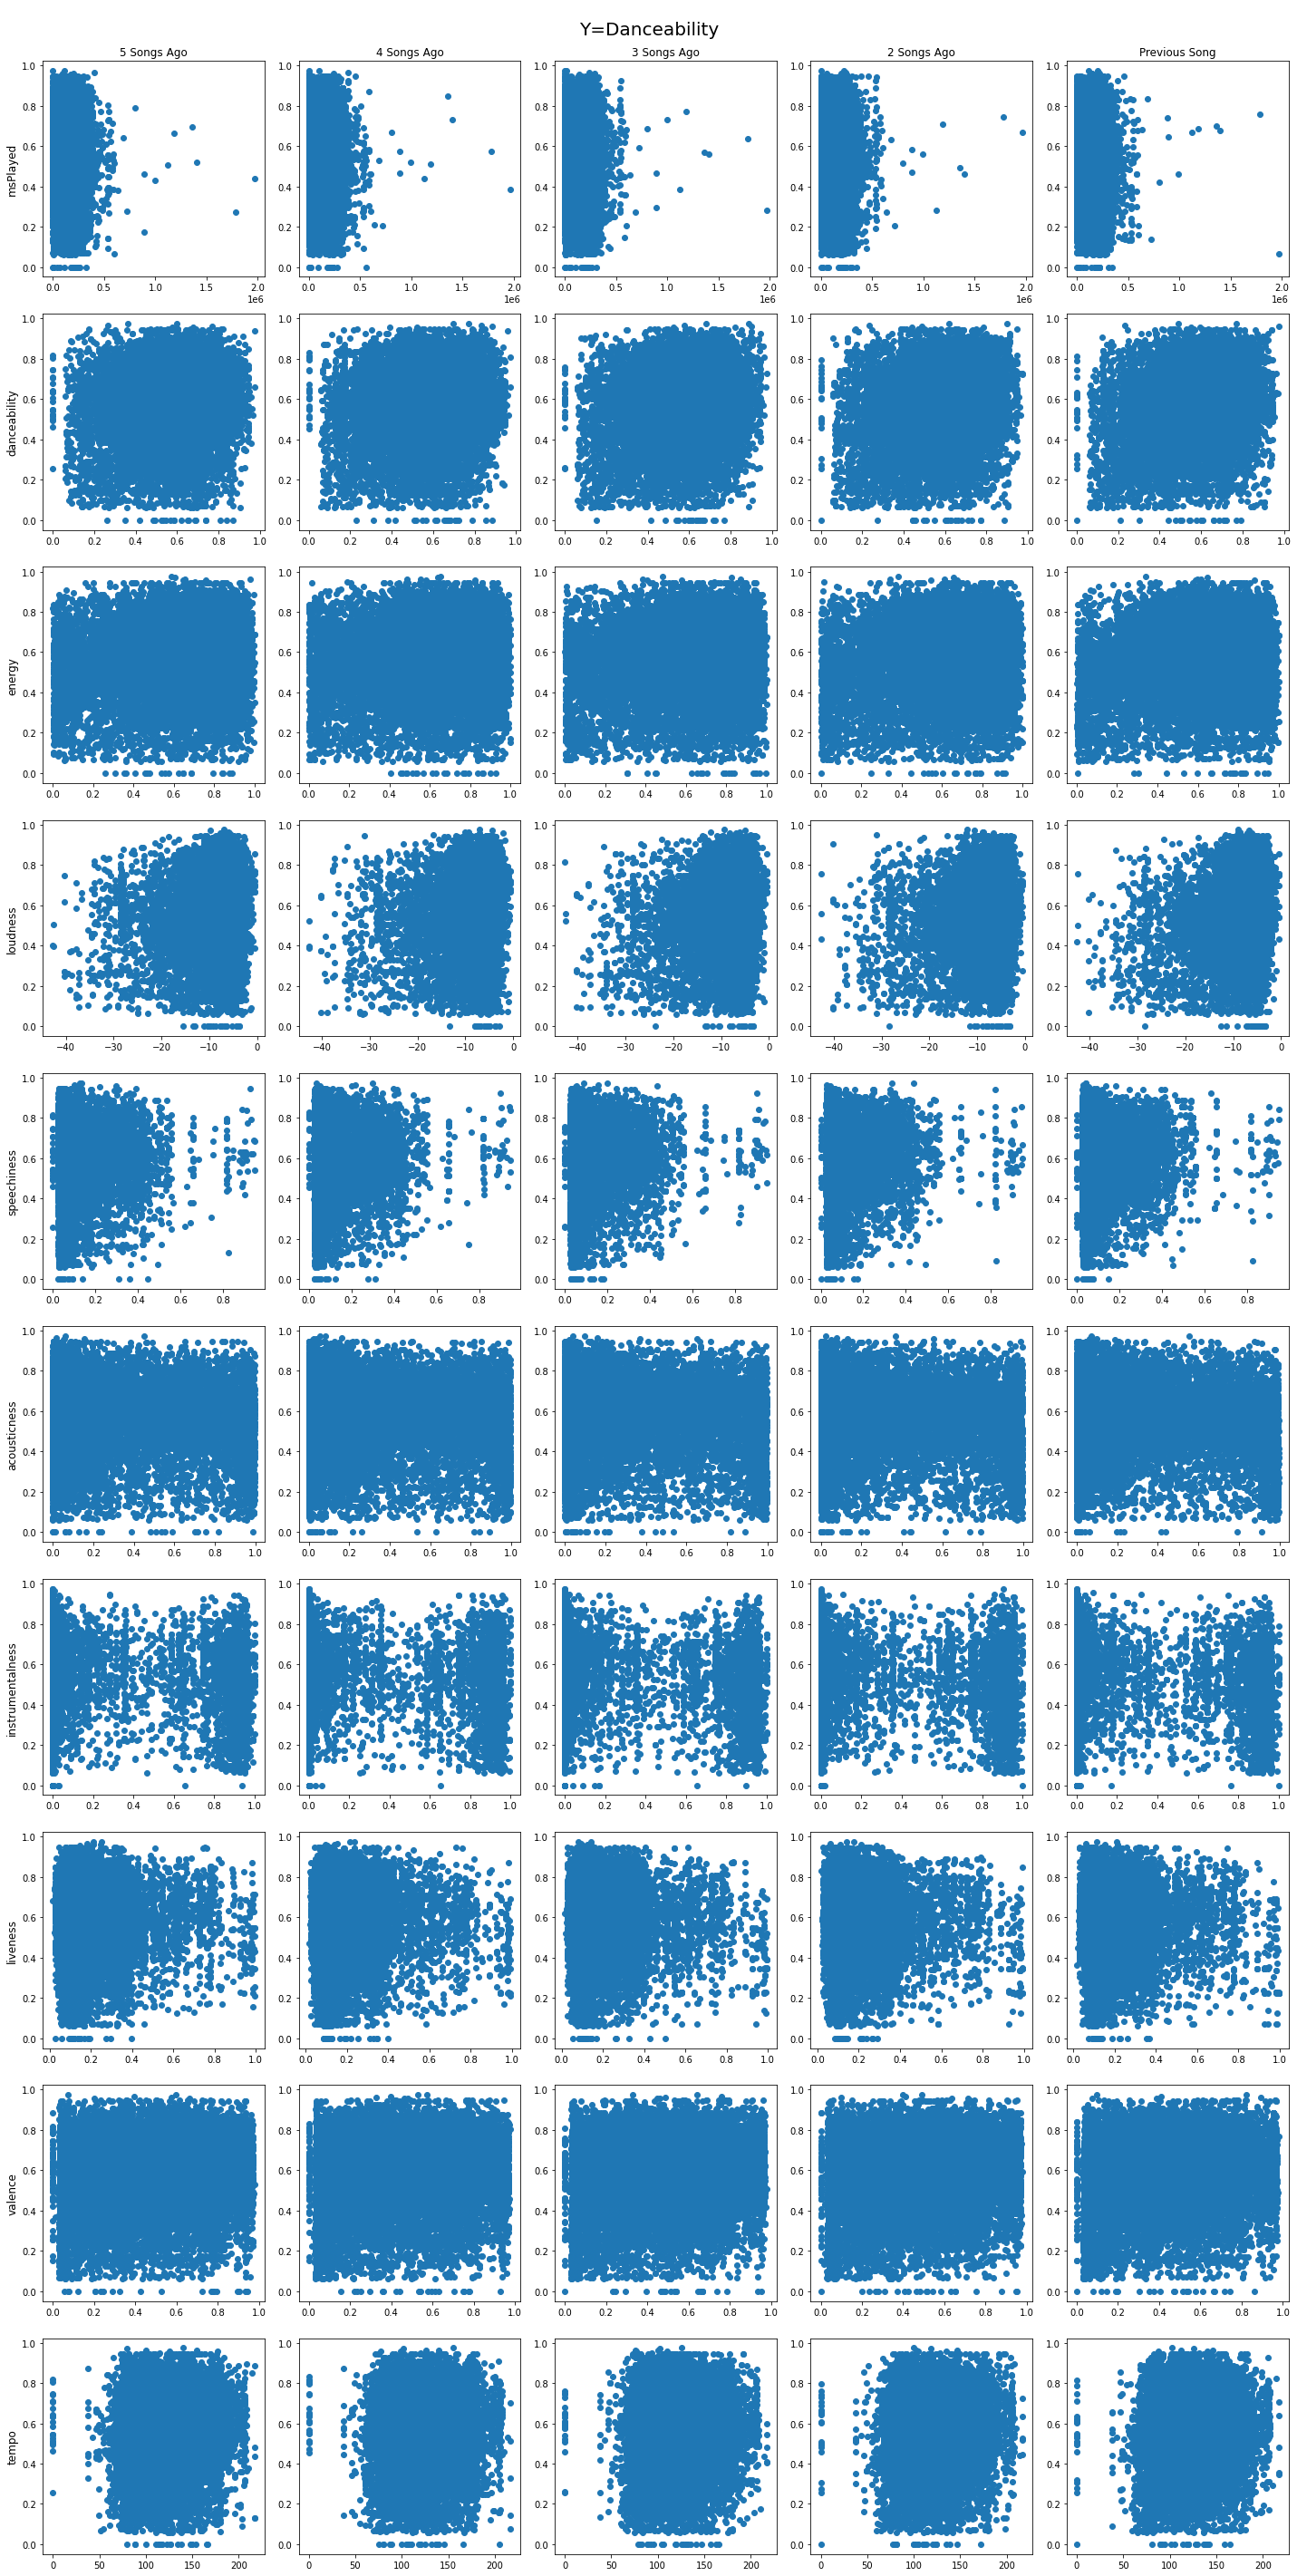

In [299]:
fig_graphs, fig_axes = plt.subplots(10,5, figsize=(20,40))
fig_axes[0,0].set_title("\n\n\n5 Songs Ago")
fig_axes[0,1].set_title("\n\n\n4 Songs Ago")
fig_axes[0,2].set_title("\n\n\n3 Songs Ago")
fig_axes[0,3].set_title("\n\n\n2 Songs Ago")
fig_axes[0,4].set_title("\n\n\nPrevious Song")
fig_axes[0,0].set_ylabel("msPlayed", size='large')
fig_axes[1,0].set_ylabel("danceability", size='large')
fig_axes[2,0].set_ylabel("energy", size='large')
fig_axes[3,0].set_ylabel("loudness", size='large')
fig_axes[4,0].set_ylabel("speechiness", size='large')
fig_axes[5,0].set_ylabel("acousticness", size='large')
fig_axes[6,0].set_ylabel("instrumentalness", size='large')
fig_axes[7,0].set_ylabel("liveness", size='large')
fig_axes[8,0].set_ylabel("valence", size='large')
fig_axes[9,0].set_ylabel("tempo", size='large')

for i in range(10):
    for j in range(5):
        fig_axes[i,j].scatter(last_five[input_cols[i] + "_" + str(j+1)],next_song["danceability"])

plt.suptitle("Y=Danceability",fontsize=20)
fig_graphs.tight_layout()

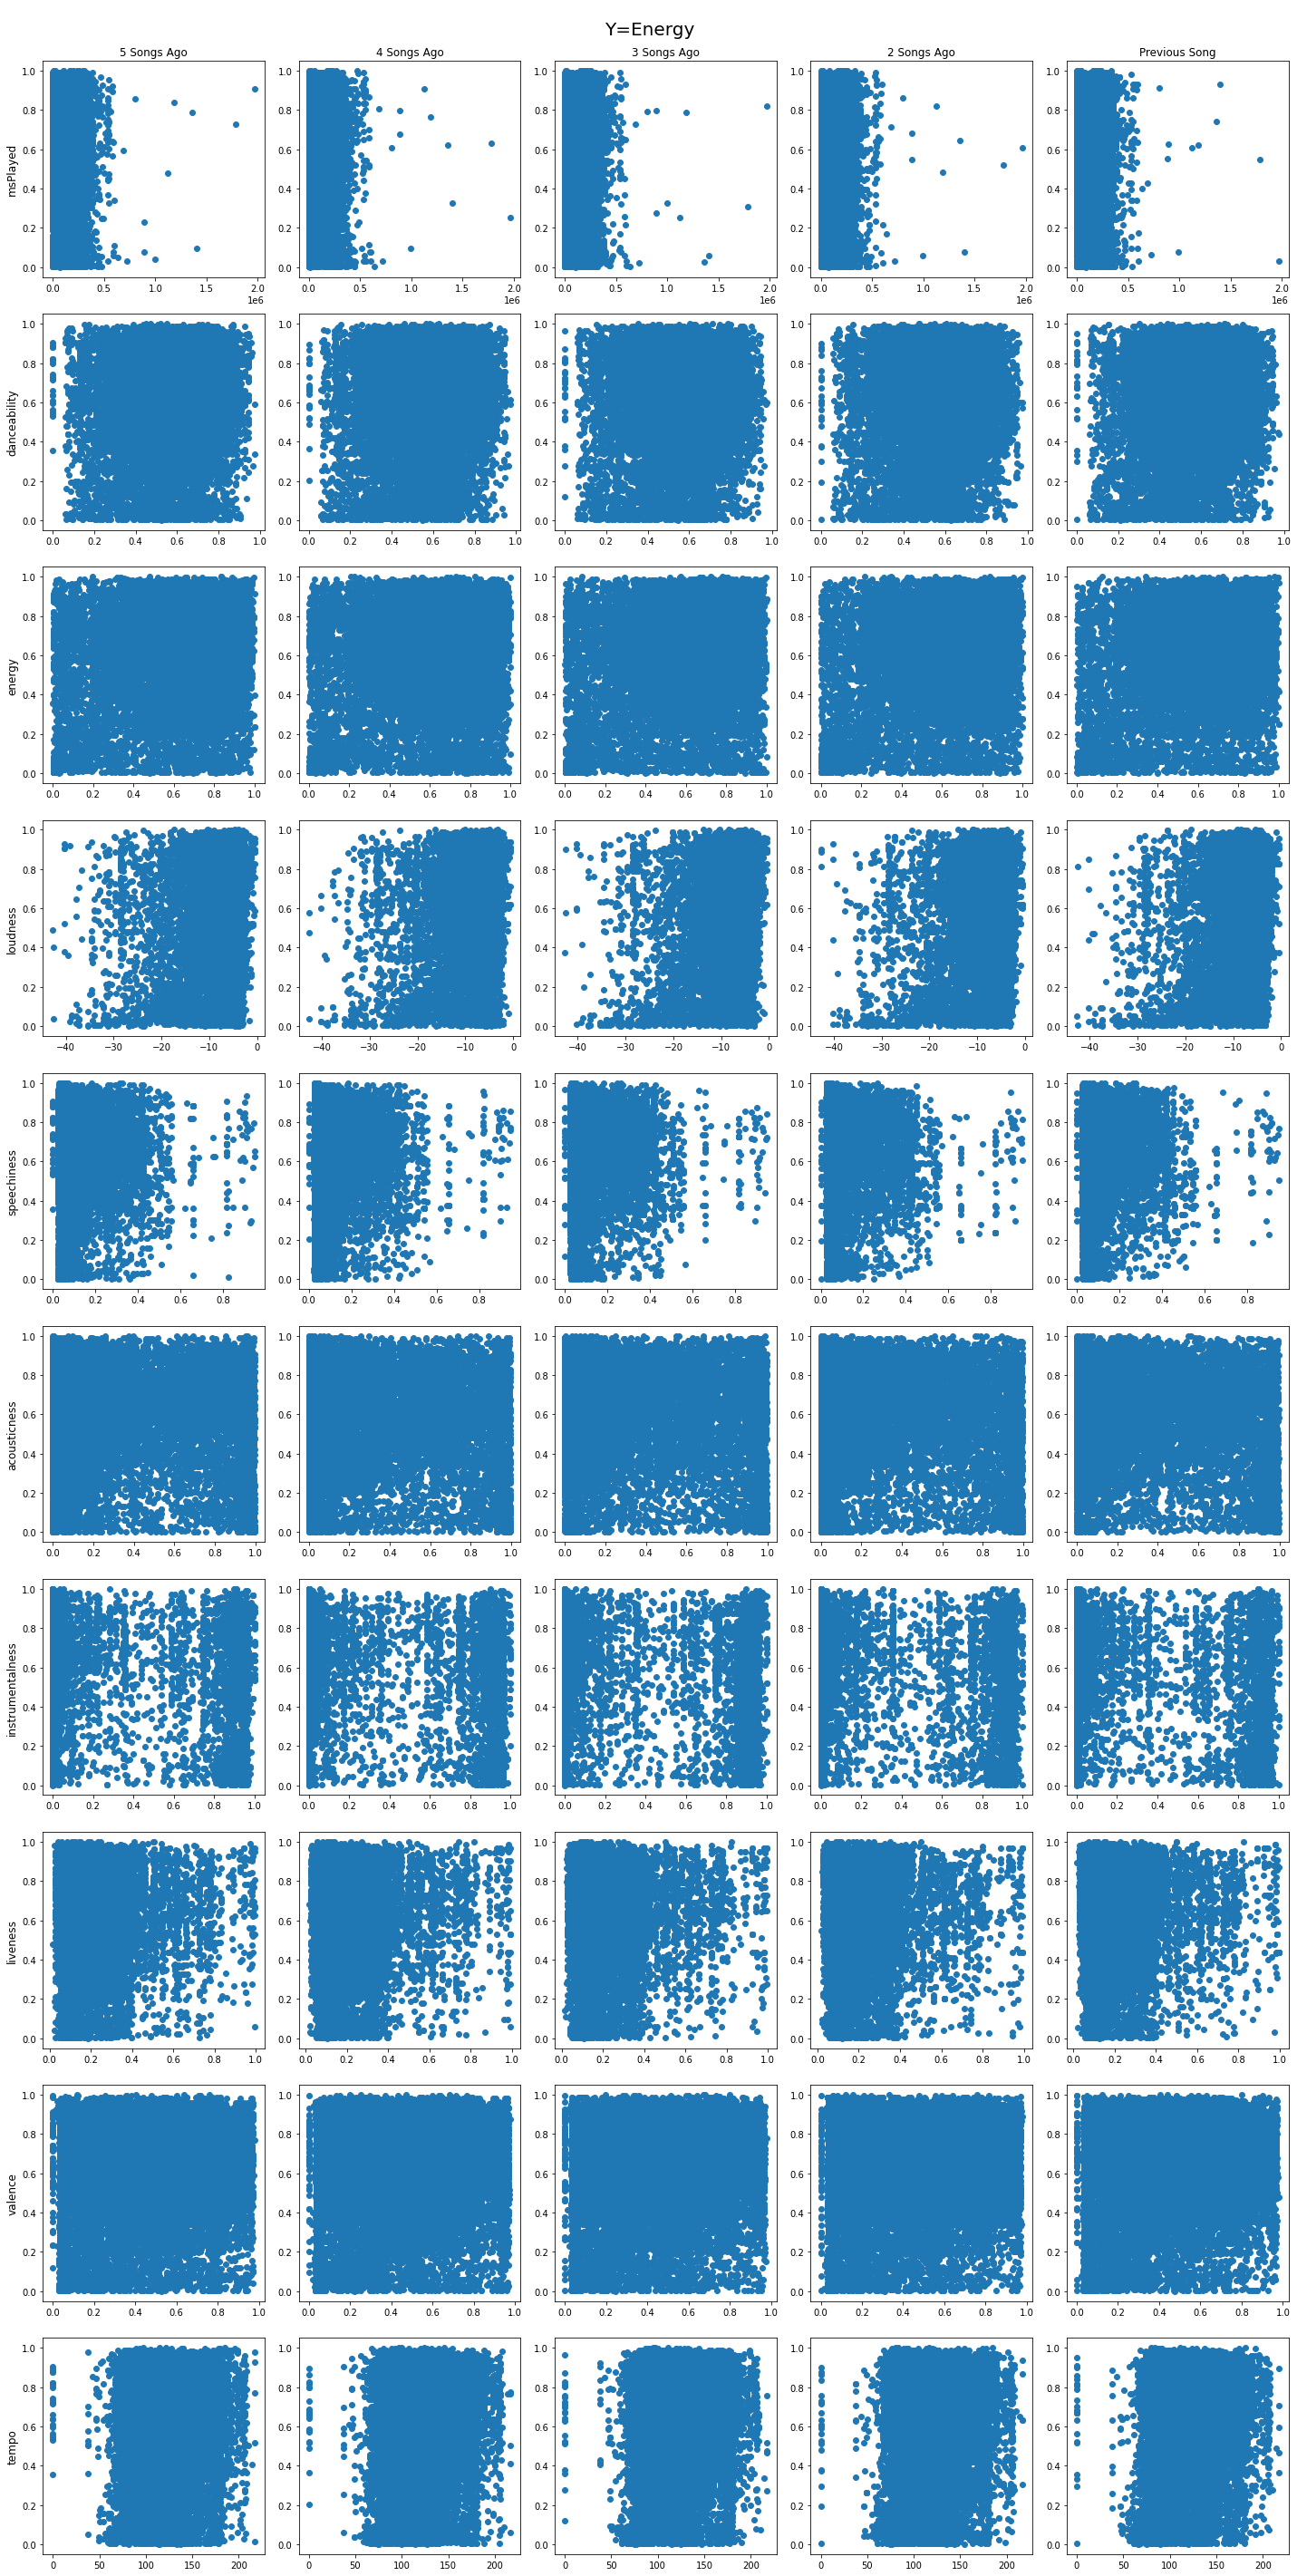

In [297]:
fig_graphs, fig_axes = plt.subplots(10,5, figsize=(20,40))
fig_axes[0,0].set_title("\n\n\n5 Songs Ago")
fig_axes[0,1].set_title("\n\n\n4 Songs Ago")
fig_axes[0,2].set_title("\n\n\n3 Songs Ago")
fig_axes[0,3].set_title("\n\n\n2 Songs Ago")
fig_axes[0,4].set_title("\n\n\nPrevious Song")
fig_axes[0,0].set_ylabel("msPlayed", size='large')
fig_axes[1,0].set_ylabel("danceability", size='large')
fig_axes[2,0].set_ylabel("energy", size='large')
fig_axes[3,0].set_ylabel("loudness", size='large')
fig_axes[4,0].set_ylabel("speechiness", size='large')
fig_axes[5,0].set_ylabel("acousticness", size='large')
fig_axes[6,0].set_ylabel("instrumentalness", size='large')
fig_axes[7,0].set_ylabel("liveness", size='large')
fig_axes[8,0].set_ylabel("valence", size='large')
fig_axes[9,0].set_ylabel("tempo", size='large')

for i in range(10):
    for j in range(5):
        fig_axes[i,j].scatter(last_five[input_cols[i] + "_" + str(j+1)],next_song["energy"])

plt.suptitle("Y=Energy",fontsize=20)
fig_graphs.tight_layout()

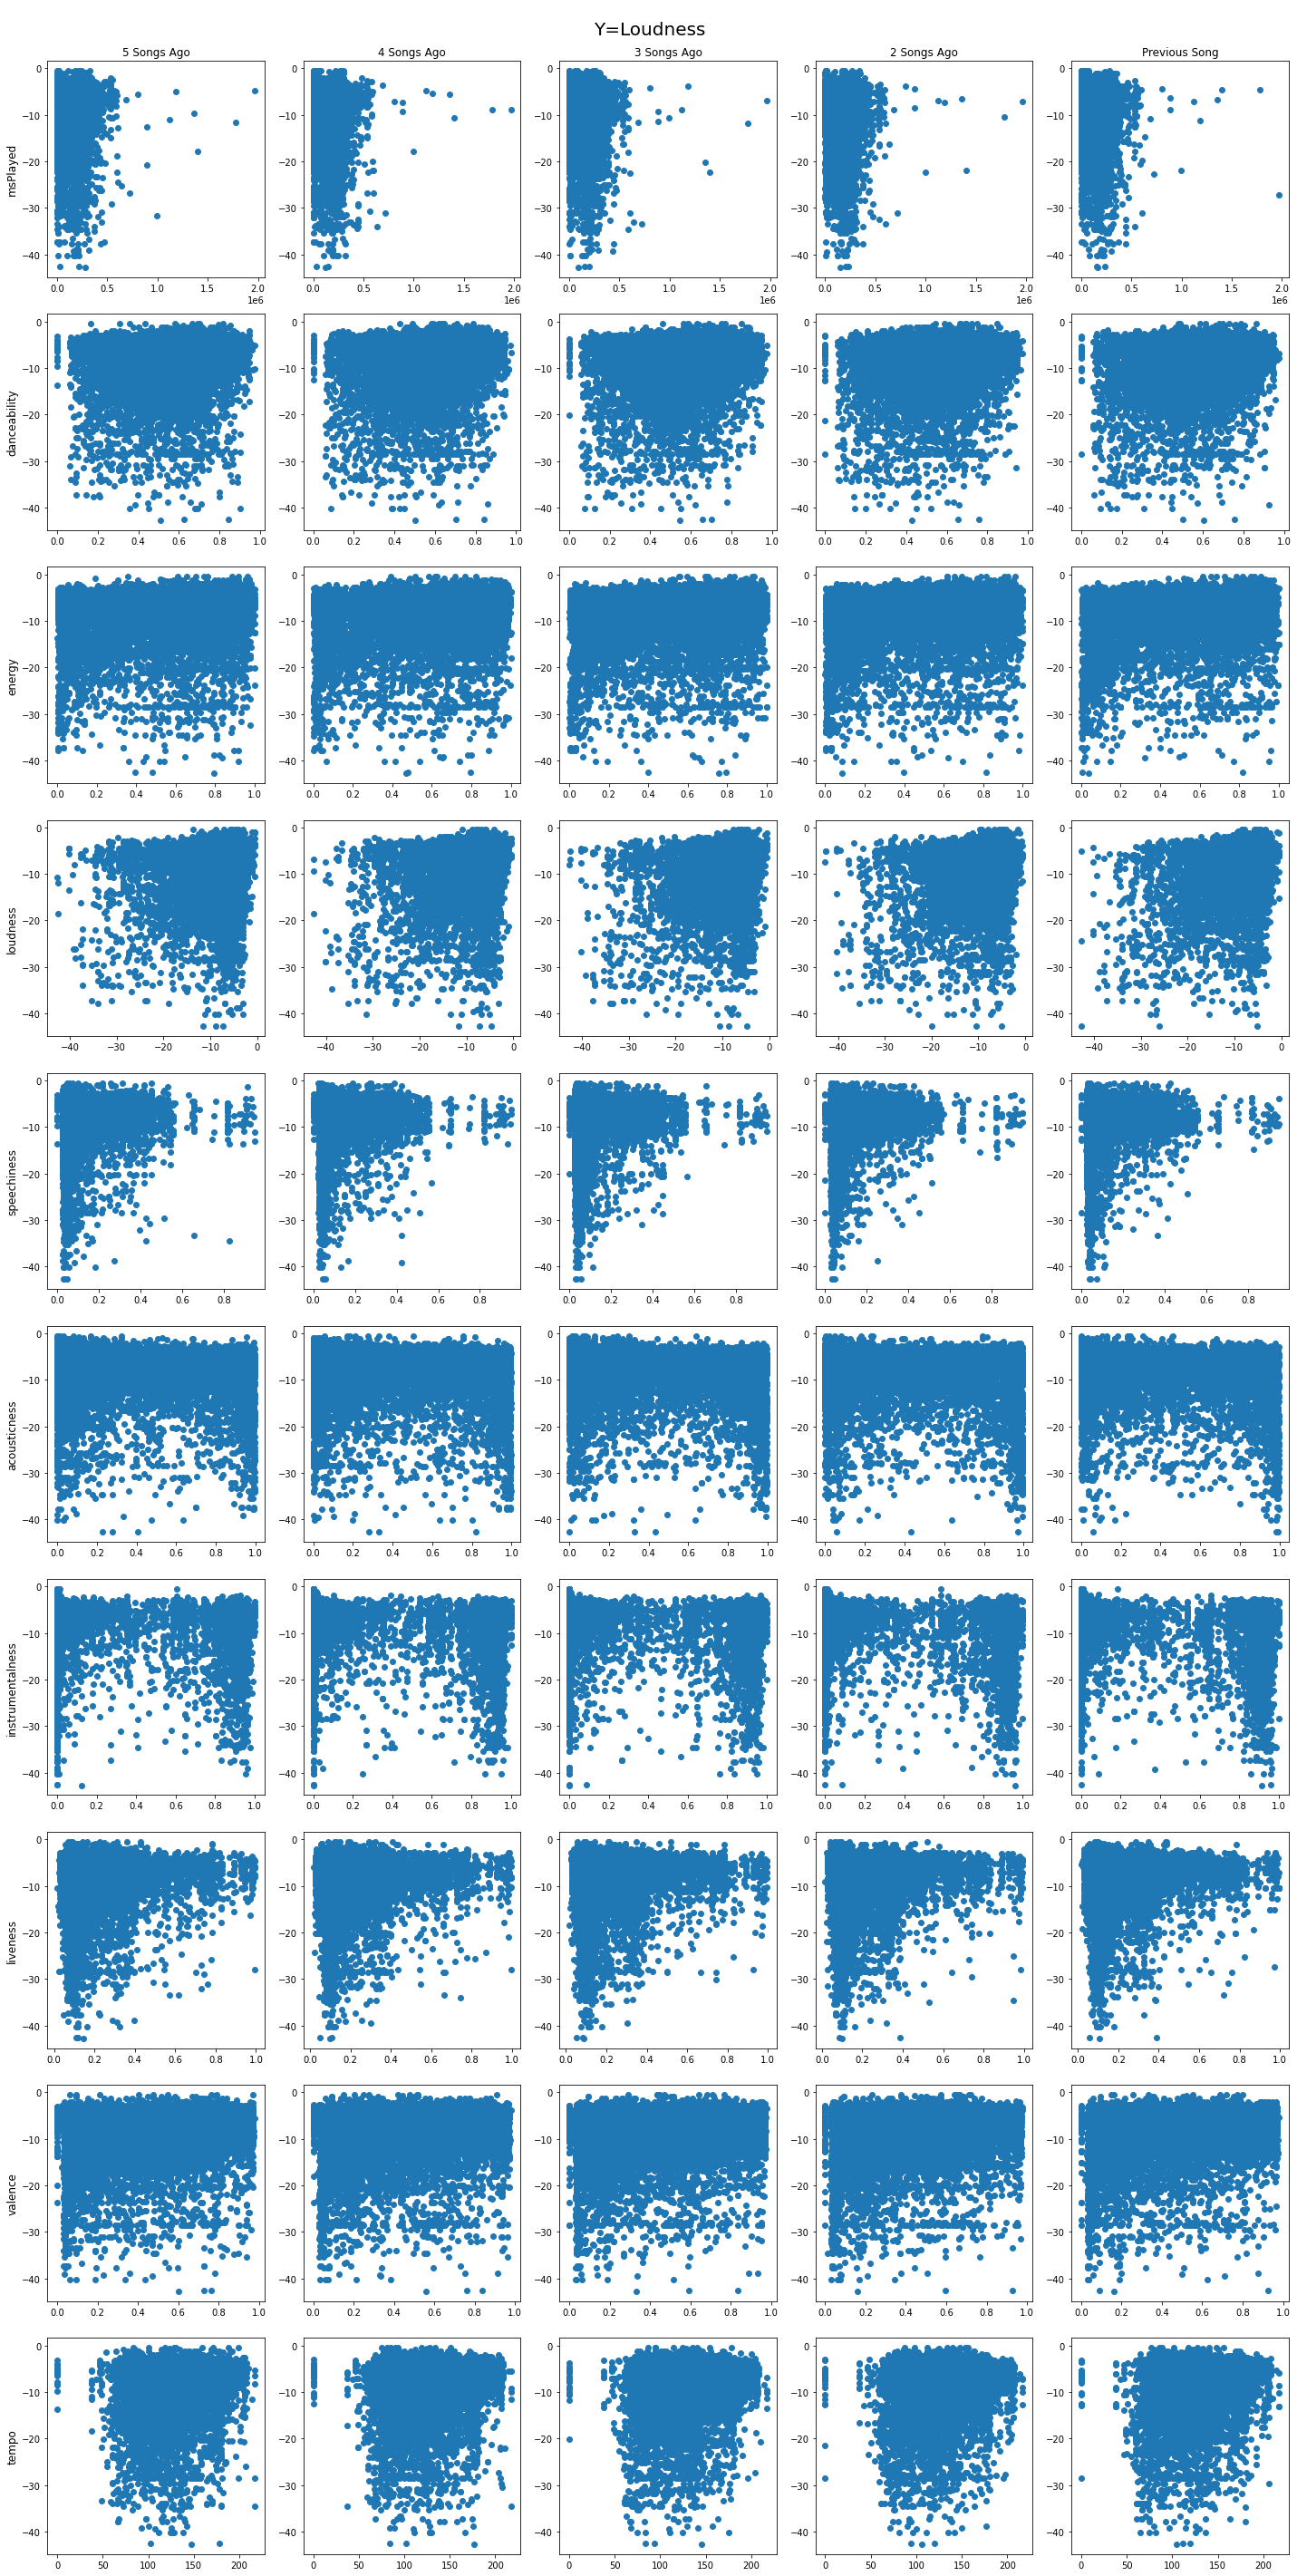

In [294]:
fig_graphs, fig_axes = plt.subplots(10,5, figsize=(20,40))
fig_axes[0,0].set_title("\n\n\n5 Songs Ago")
fig_axes[0,1].set_title("\n\n\n4 Songs Ago")
fig_axes[0,2].set_title("\n\n\n3 Songs Ago")
fig_axes[0,3].set_title("\n\n\n2 Songs Ago")
fig_axes[0,4].set_title("\n\n\nPrevious Song")
fig_axes[0,0].set_ylabel("msPlayed", size='large')
fig_axes[1,0].set_ylabel("danceability", size='large')
fig_axes[2,0].set_ylabel("energy", size='large')
fig_axes[3,0].set_ylabel("loudness", size='large')
fig_axes[4,0].set_ylabel("speechiness", size='large')
fig_axes[5,0].set_ylabel("acousticness", size='large')
fig_axes[6,0].set_ylabel("instrumentalness", size='large')
fig_axes[7,0].set_ylabel("liveness", size='large')
fig_axes[8,0].set_ylabel("valence", size='large')
fig_axes[9,0].set_ylabel("tempo", size='large')

for i in range(10):
    for j in range(5):
        fig_axes[i,j].scatter(last_five[input_cols[i] + "_" + str(j+1)],next_song["loudness"])

plt.suptitle("Y=Loudness",fontsize=20)
fig_graphs.tight_layout()

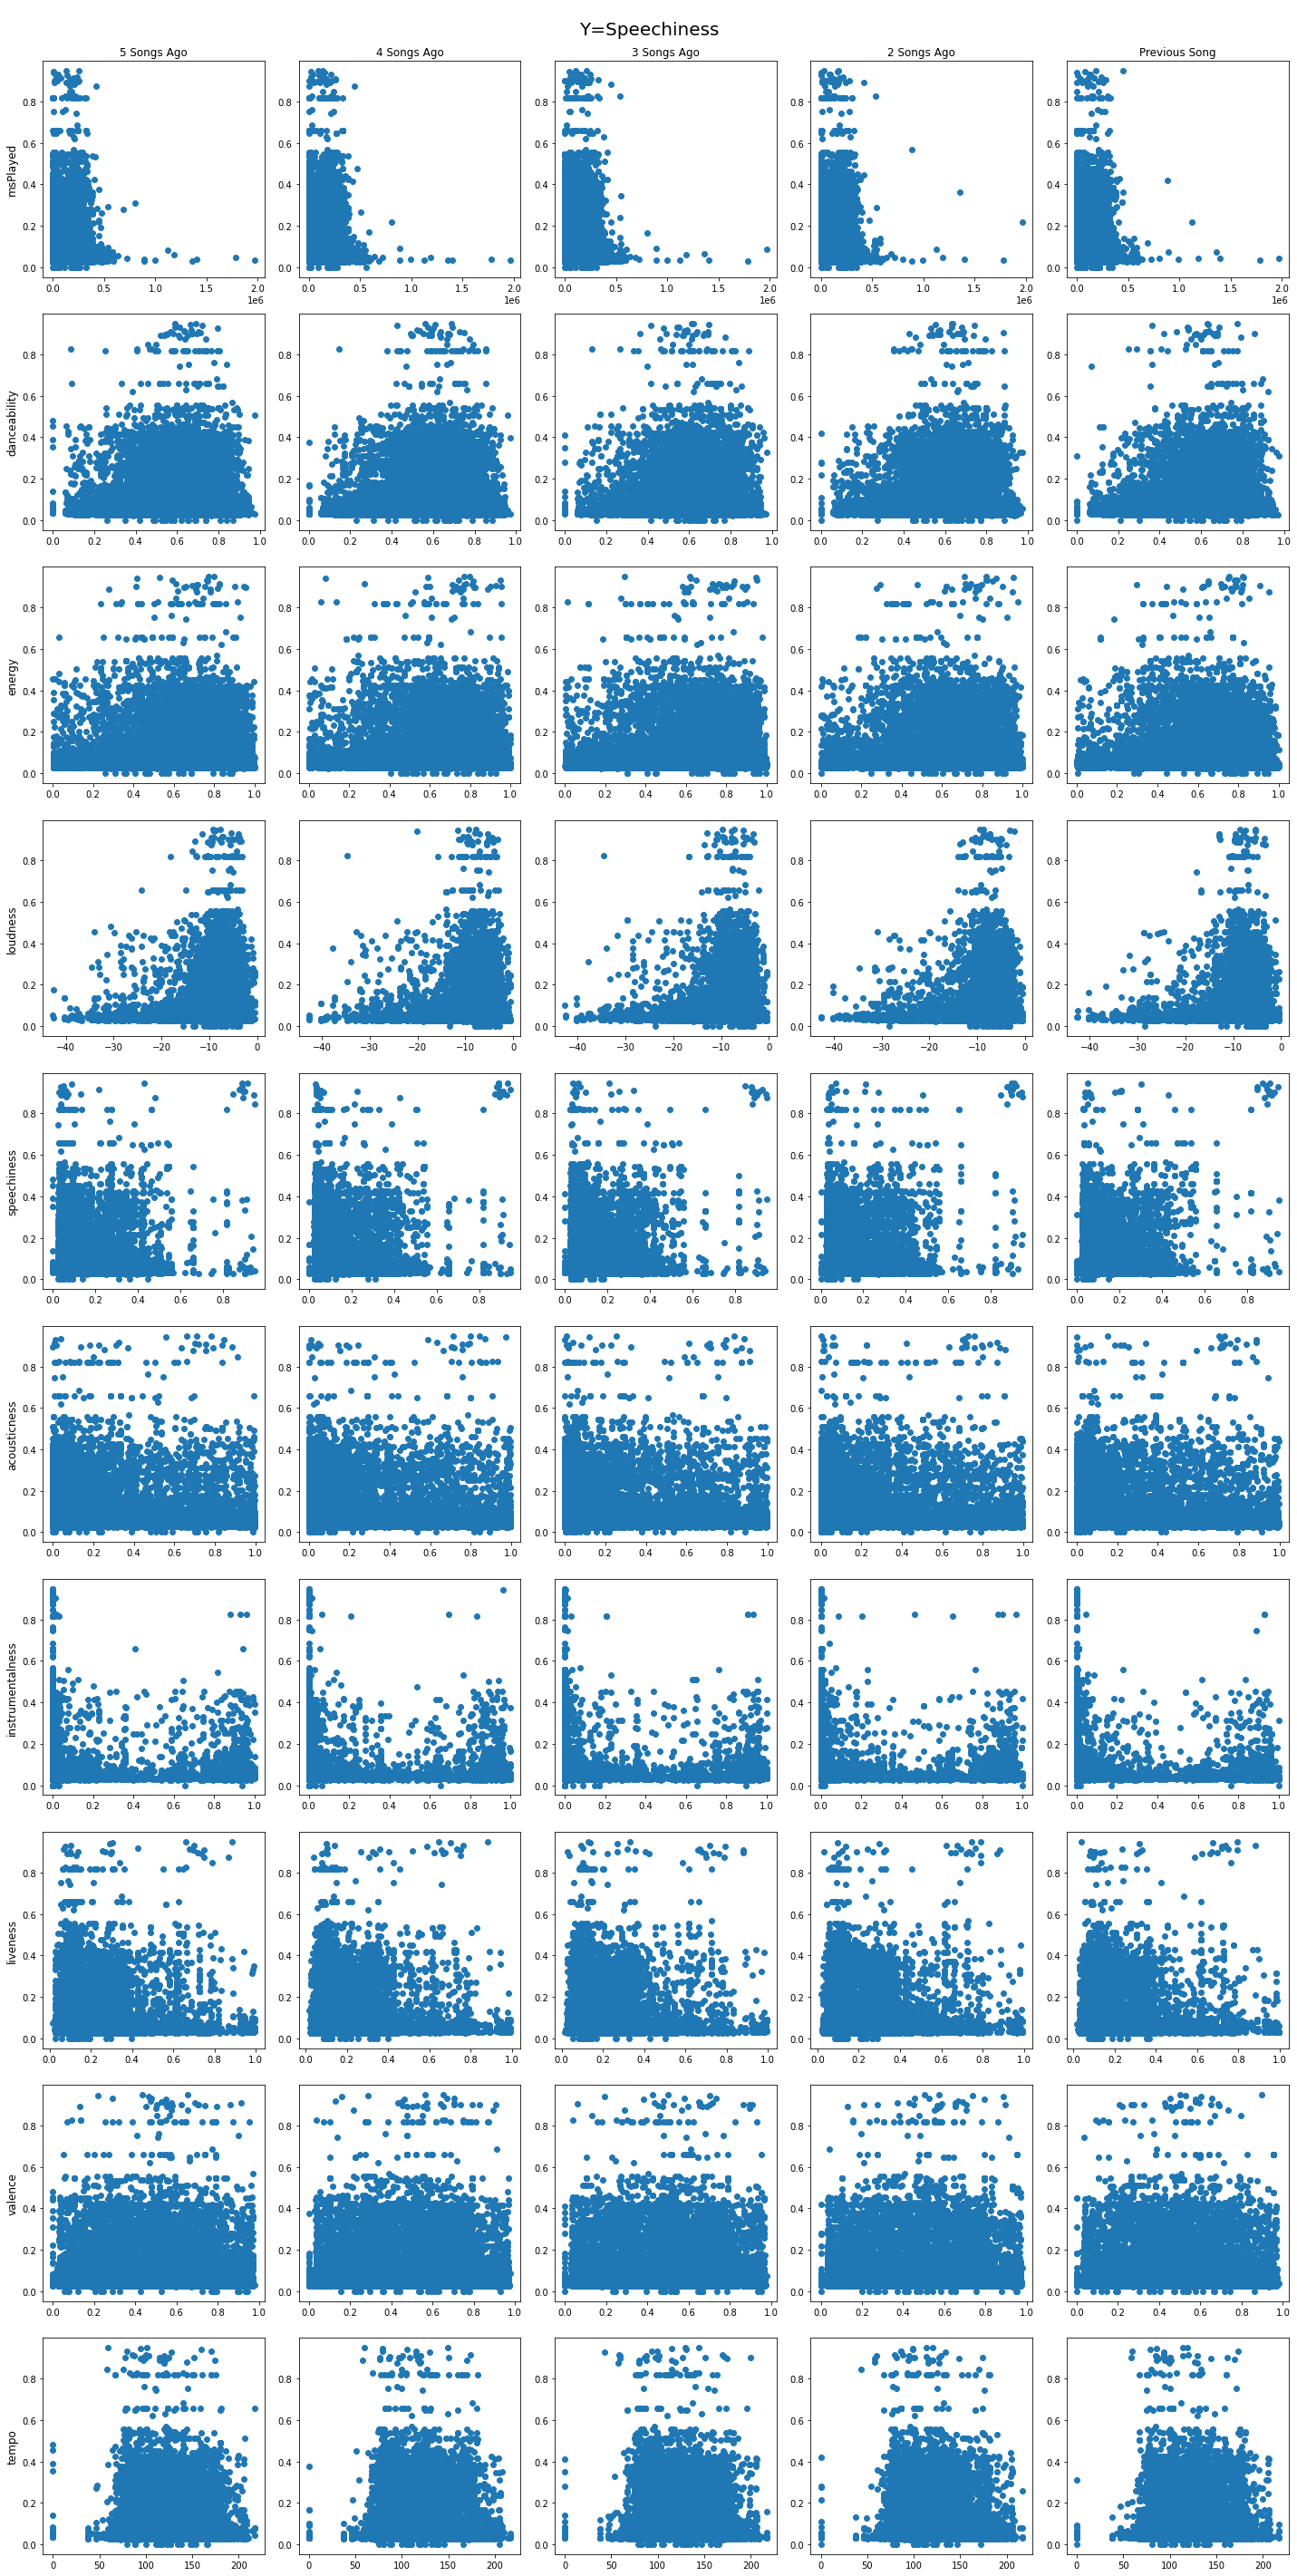

In [295]:
fig_graphs, fig_axes = plt.subplots(10,5, figsize=(20,40))
fig_axes[0,0].set_title("\n\n\n5 Songs Ago")
fig_axes[0,1].set_title("\n\n\n4 Songs Ago")
fig_axes[0,2].set_title("\n\n\n3 Songs Ago")
fig_axes[0,3].set_title("\n\n\n2 Songs Ago")
fig_axes[0,4].set_title("\n\n\nPrevious Song")
fig_axes[0,0].set_ylabel("msPlayed", size='large')
fig_axes[1,0].set_ylabel("danceability", size='large')
fig_axes[2,0].set_ylabel("energy", size='large')
fig_axes[3,0].set_ylabel("loudness", size='large')
fig_axes[4,0].set_ylabel("speechiness", size='large')
fig_axes[5,0].set_ylabel("acousticness", size='large')
fig_axes[6,0].set_ylabel("instrumentalness", size='large')
fig_axes[7,0].set_ylabel("liveness", size='large')
fig_axes[8,0].set_ylabel("valence", size='large')
fig_axes[9,0].set_ylabel("tempo", size='large')

for i in range(10):
    for j in range(5):
        fig_axes[i,j].scatter(last_five[input_cols[i] + "_" + str(j+1)],next_song["speechiness"])

plt.suptitle("Y=Speechiness",fontsize=20)
fig_graphs.tight_layout()

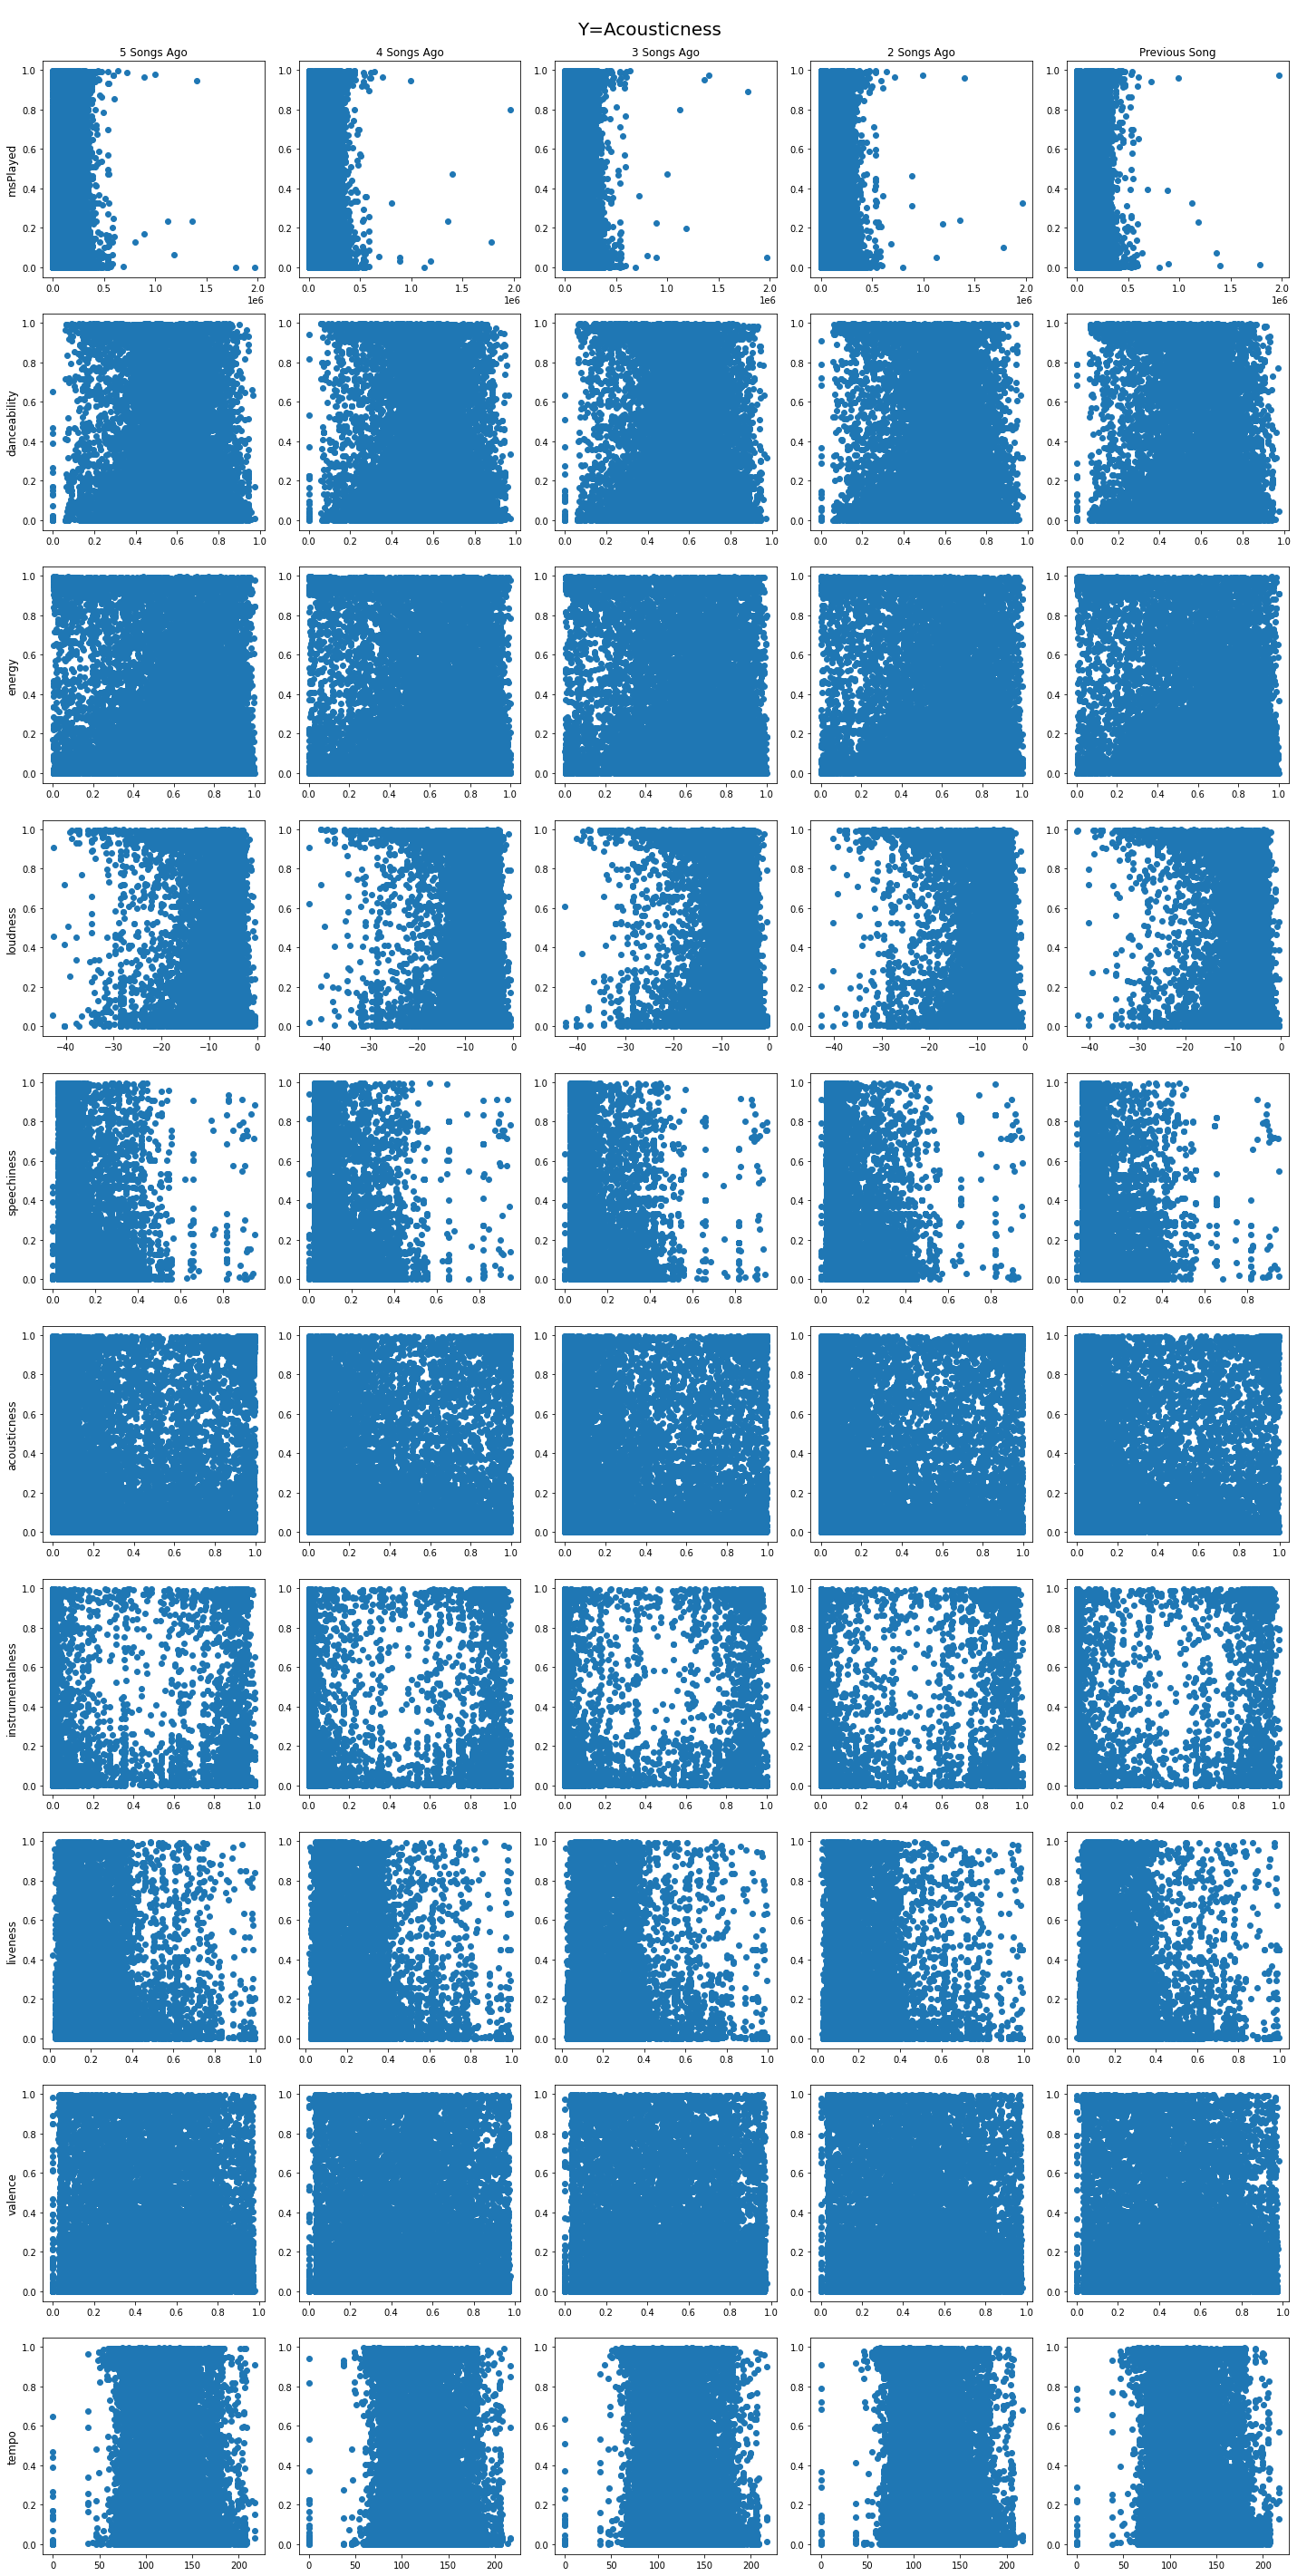

In [300]:
fig_graphs, fig_axes = plt.subplots(10,5, figsize=(20,40))
fig_axes[0,0].set_title("\n\n\n5 Songs Ago")
fig_axes[0,1].set_title("\n\n\n4 Songs Ago")
fig_axes[0,2].set_title("\n\n\n3 Songs Ago")
fig_axes[0,3].set_title("\n\n\n2 Songs Ago")
fig_axes[0,4].set_title("\n\n\nPrevious Song")
fig_axes[0,0].set_ylabel("msPlayed", size='large')
fig_axes[1,0].set_ylabel("danceability", size='large')
fig_axes[2,0].set_ylabel("energy", size='large')
fig_axes[3,0].set_ylabel("loudness", size='large')
fig_axes[4,0].set_ylabel("speechiness", size='large')
fig_axes[5,0].set_ylabel("acousticness", size='large')
fig_axes[6,0].set_ylabel("instrumentalness", size='large')
fig_axes[7,0].set_ylabel("liveness", size='large')
fig_axes[8,0].set_ylabel("valence", size='large')
fig_axes[9,0].set_ylabel("tempo", size='large')

for i in range(10):
    for j in range(5):
        fig_axes[i,j].scatter(last_five[input_cols[i] + "_" + str(j+1)],next_song["acousticness"])

plt.suptitle("Y=Acousticness",fontsize=20)
fig_graphs.tight_layout()

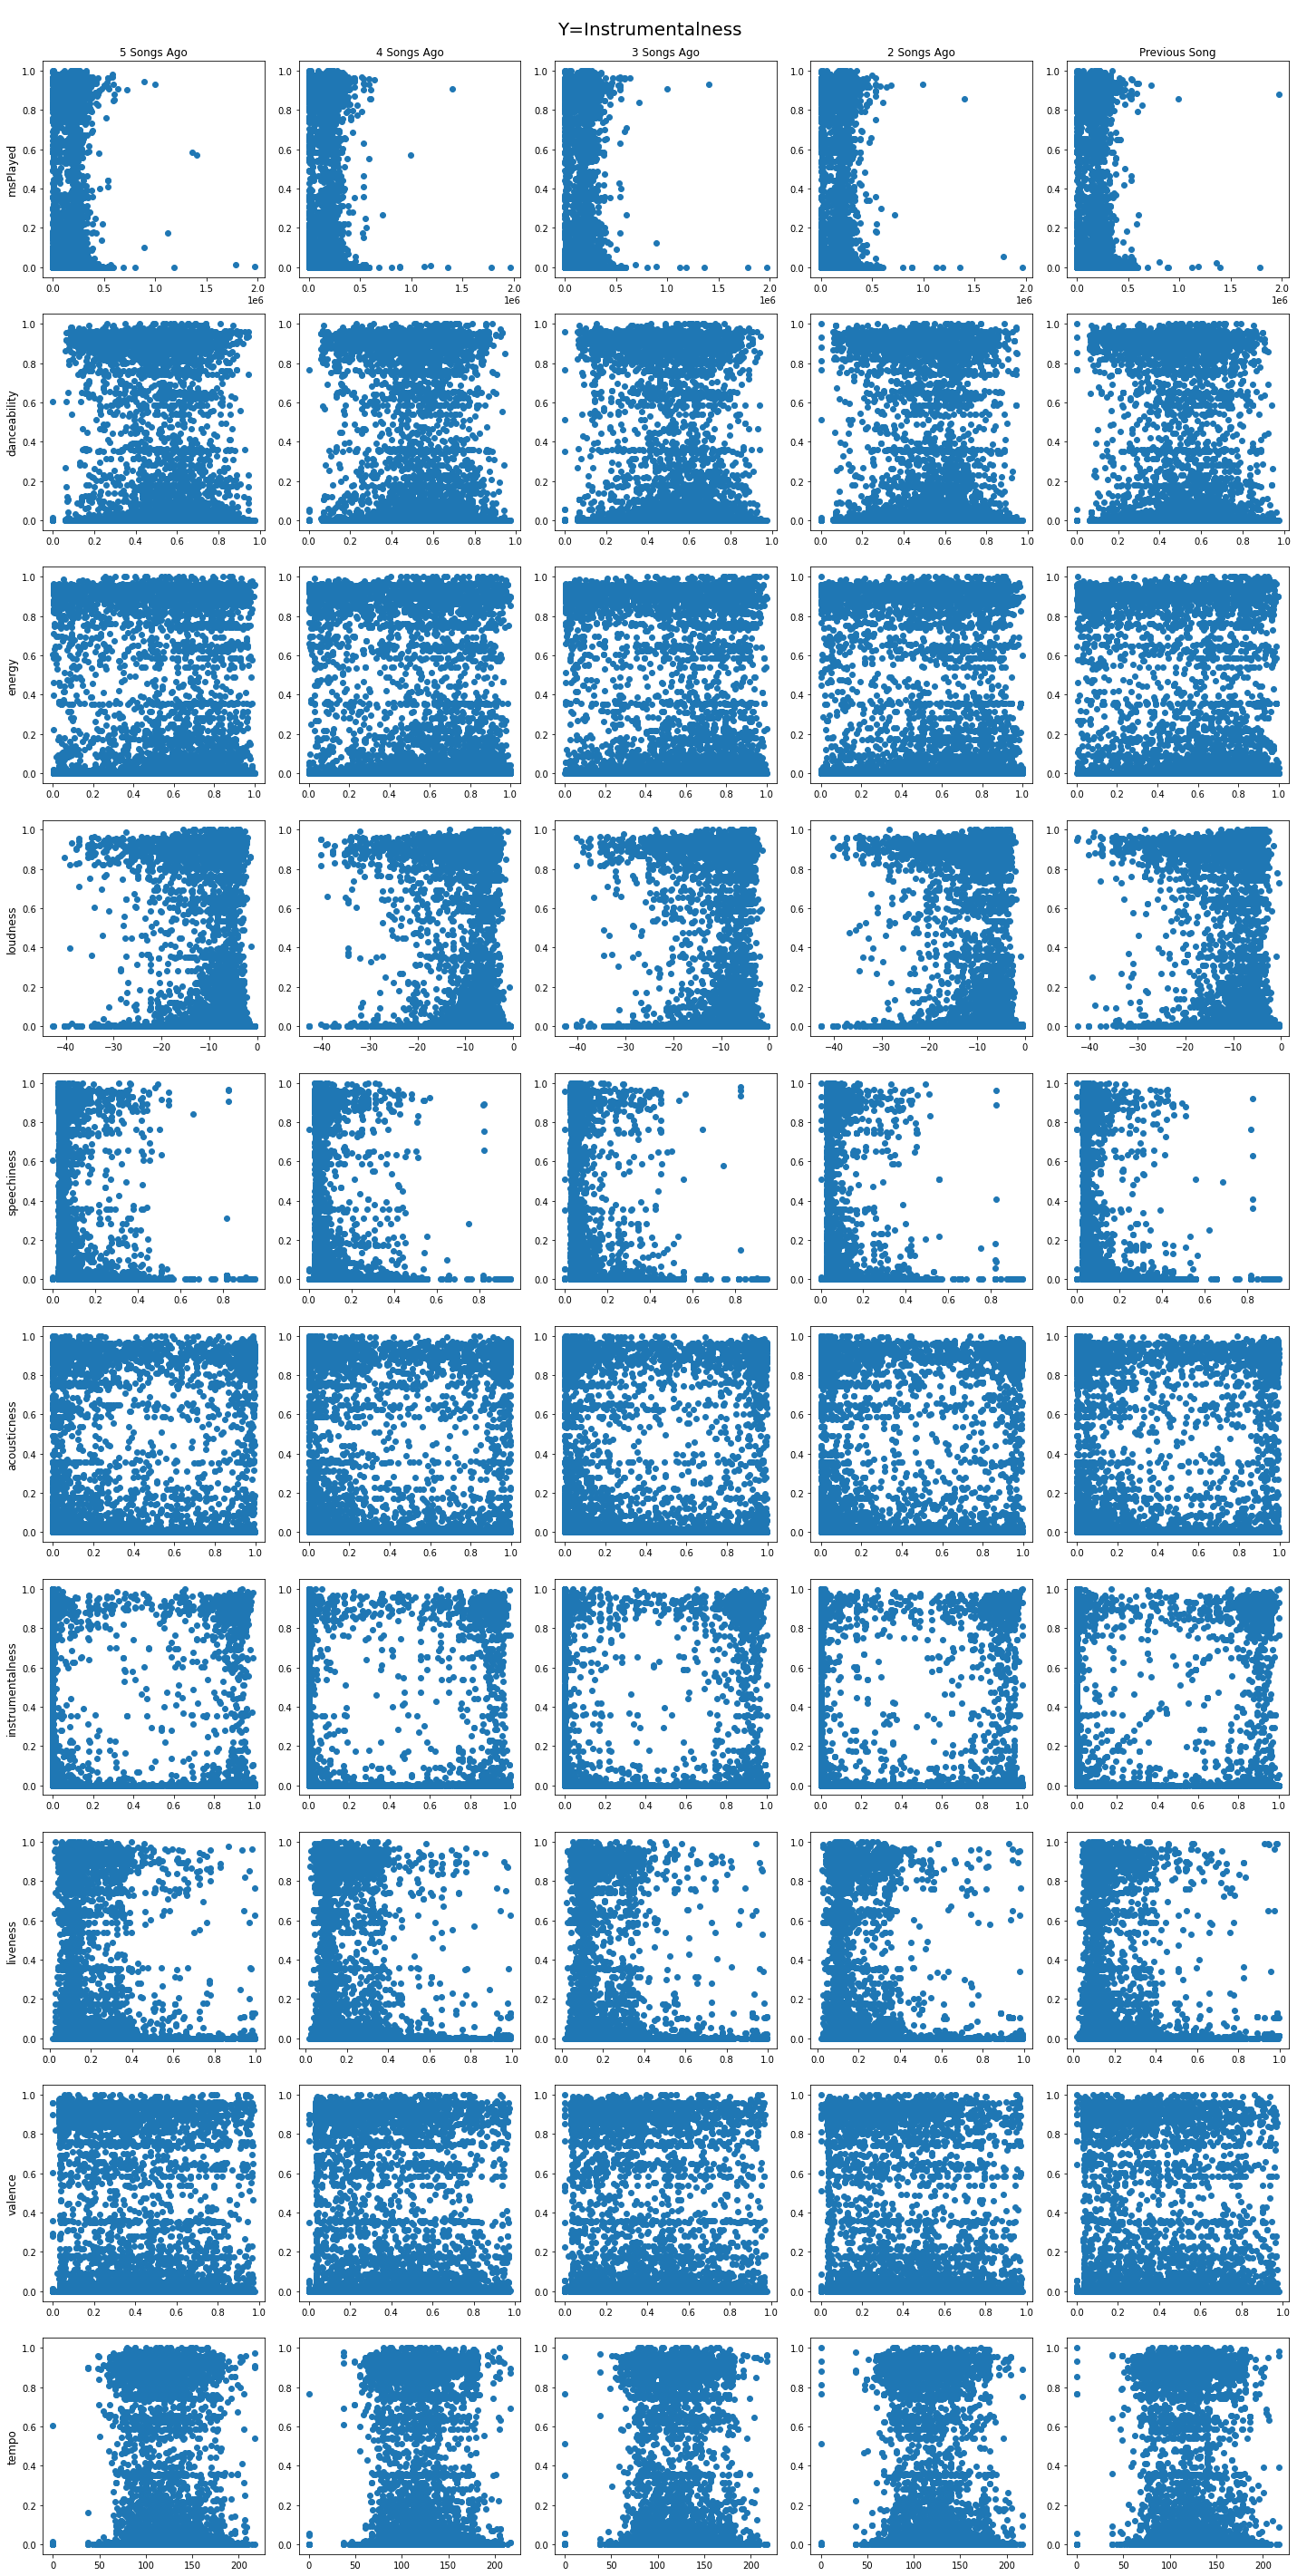

In [301]:
fig_graphs, fig_axes = plt.subplots(10,5, figsize=(20,40))
fig_axes[0,0].set_title("\n\n\n5 Songs Ago")
fig_axes[0,1].set_title("\n\n\n4 Songs Ago")
fig_axes[0,2].set_title("\n\n\n3 Songs Ago")
fig_axes[0,3].set_title("\n\n\n2 Songs Ago")
fig_axes[0,4].set_title("\n\n\nPrevious Song")
fig_axes[0,0].set_ylabel("msPlayed", size='large')
fig_axes[1,0].set_ylabel("danceability", size='large')
fig_axes[2,0].set_ylabel("energy", size='large')
fig_axes[3,0].set_ylabel("loudness", size='large')
fig_axes[4,0].set_ylabel("speechiness", size='large')
fig_axes[5,0].set_ylabel("acousticness", size='large')
fig_axes[6,0].set_ylabel("instrumentalness", size='large')
fig_axes[7,0].set_ylabel("liveness", size='large')
fig_axes[8,0].set_ylabel("valence", size='large')
fig_axes[9,0].set_ylabel("tempo", size='large')

for i in range(10):
    for j in range(5):
        fig_axes[i,j].scatter(last_five[input_cols[i] + "_" + str(j+1)],next_song["instrumentalness"])

plt.suptitle("Y=Instrumentalness",fontsize=20)
fig_graphs.tight_layout()

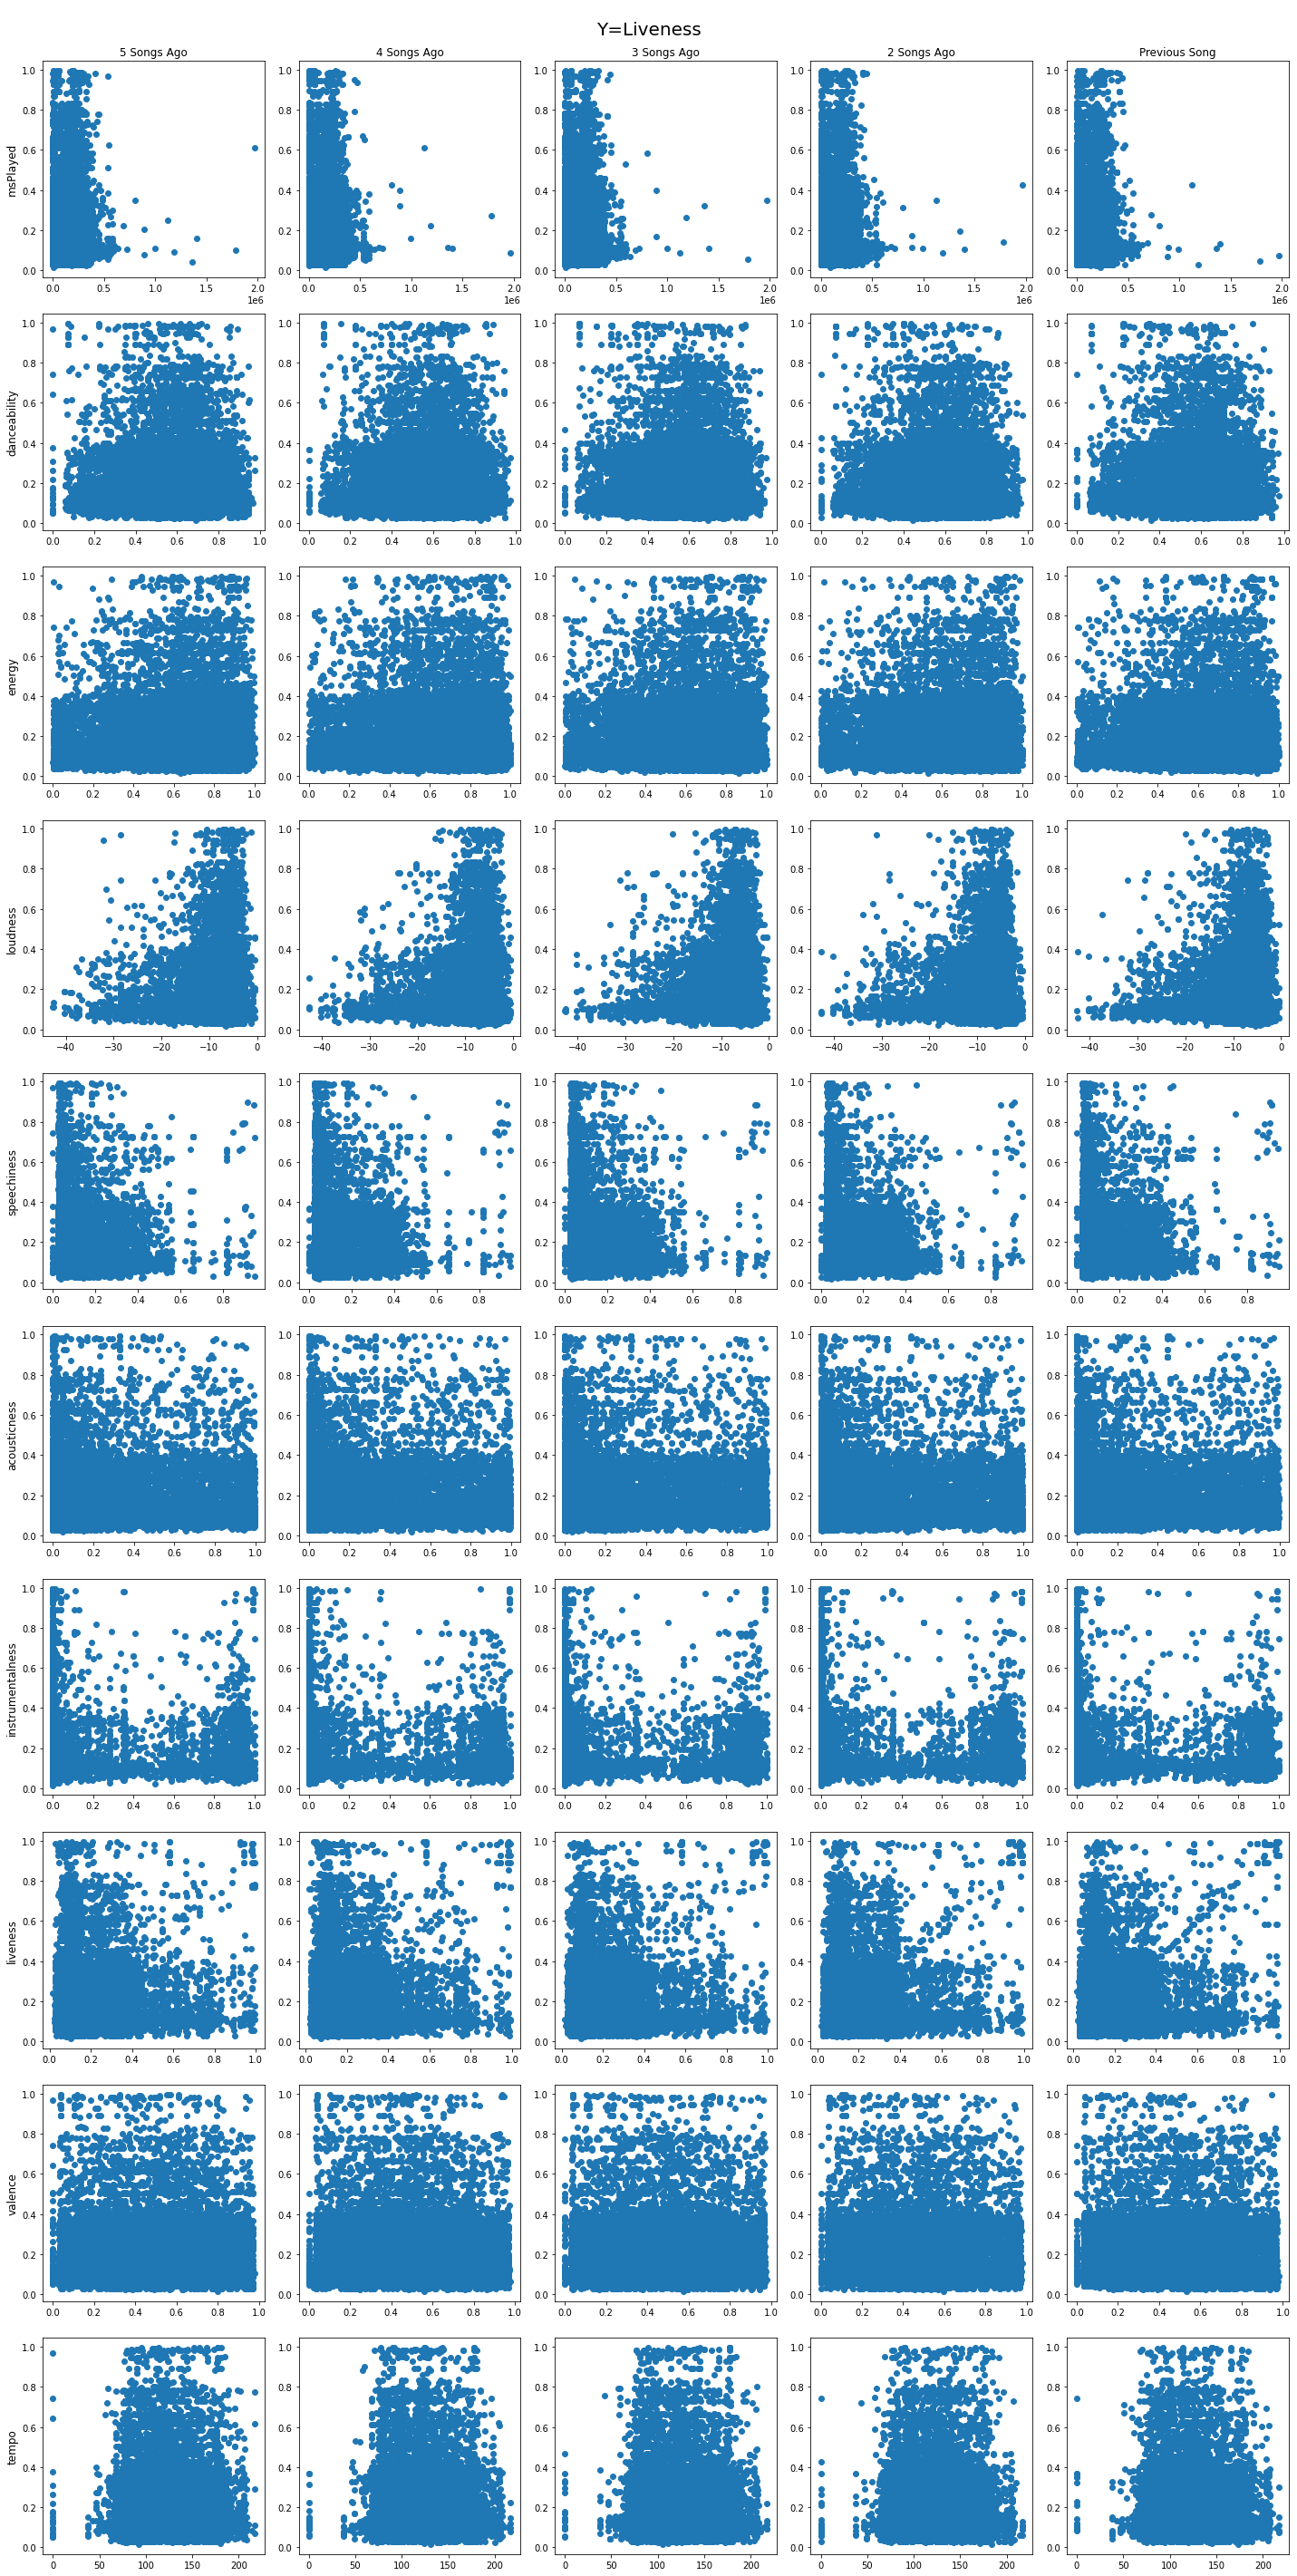

In [302]:
fig_graphs, fig_axes = plt.subplots(10,5, figsize=(20,40))
fig_axes[0,0].set_title("\n\n\n5 Songs Ago")
fig_axes[0,1].set_title("\n\n\n4 Songs Ago")
fig_axes[0,2].set_title("\n\n\n3 Songs Ago")
fig_axes[0,3].set_title("\n\n\n2 Songs Ago")
fig_axes[0,4].set_title("\n\n\nPrevious Song")
fig_axes[0,0].set_ylabel("msPlayed", size='large')
fig_axes[1,0].set_ylabel("danceability", size='large')
fig_axes[2,0].set_ylabel("energy", size='large')
fig_axes[3,0].set_ylabel("loudness", size='large')
fig_axes[4,0].set_ylabel("speechiness", size='large')
fig_axes[5,0].set_ylabel("acousticness", size='large')
fig_axes[6,0].set_ylabel("instrumentalness", size='large')
fig_axes[7,0].set_ylabel("liveness", size='large')
fig_axes[8,0].set_ylabel("valence", size='large')
fig_axes[9,0].set_ylabel("tempo", size='large')

for i in range(10):
    for j in range(5):
        fig_axes[i,j].scatter(last_five[input_cols[i] + "_" + str(j+1)],next_song["liveness"])

plt.suptitle("Y=Liveness",fontsize=20)
fig_graphs.tight_layout()

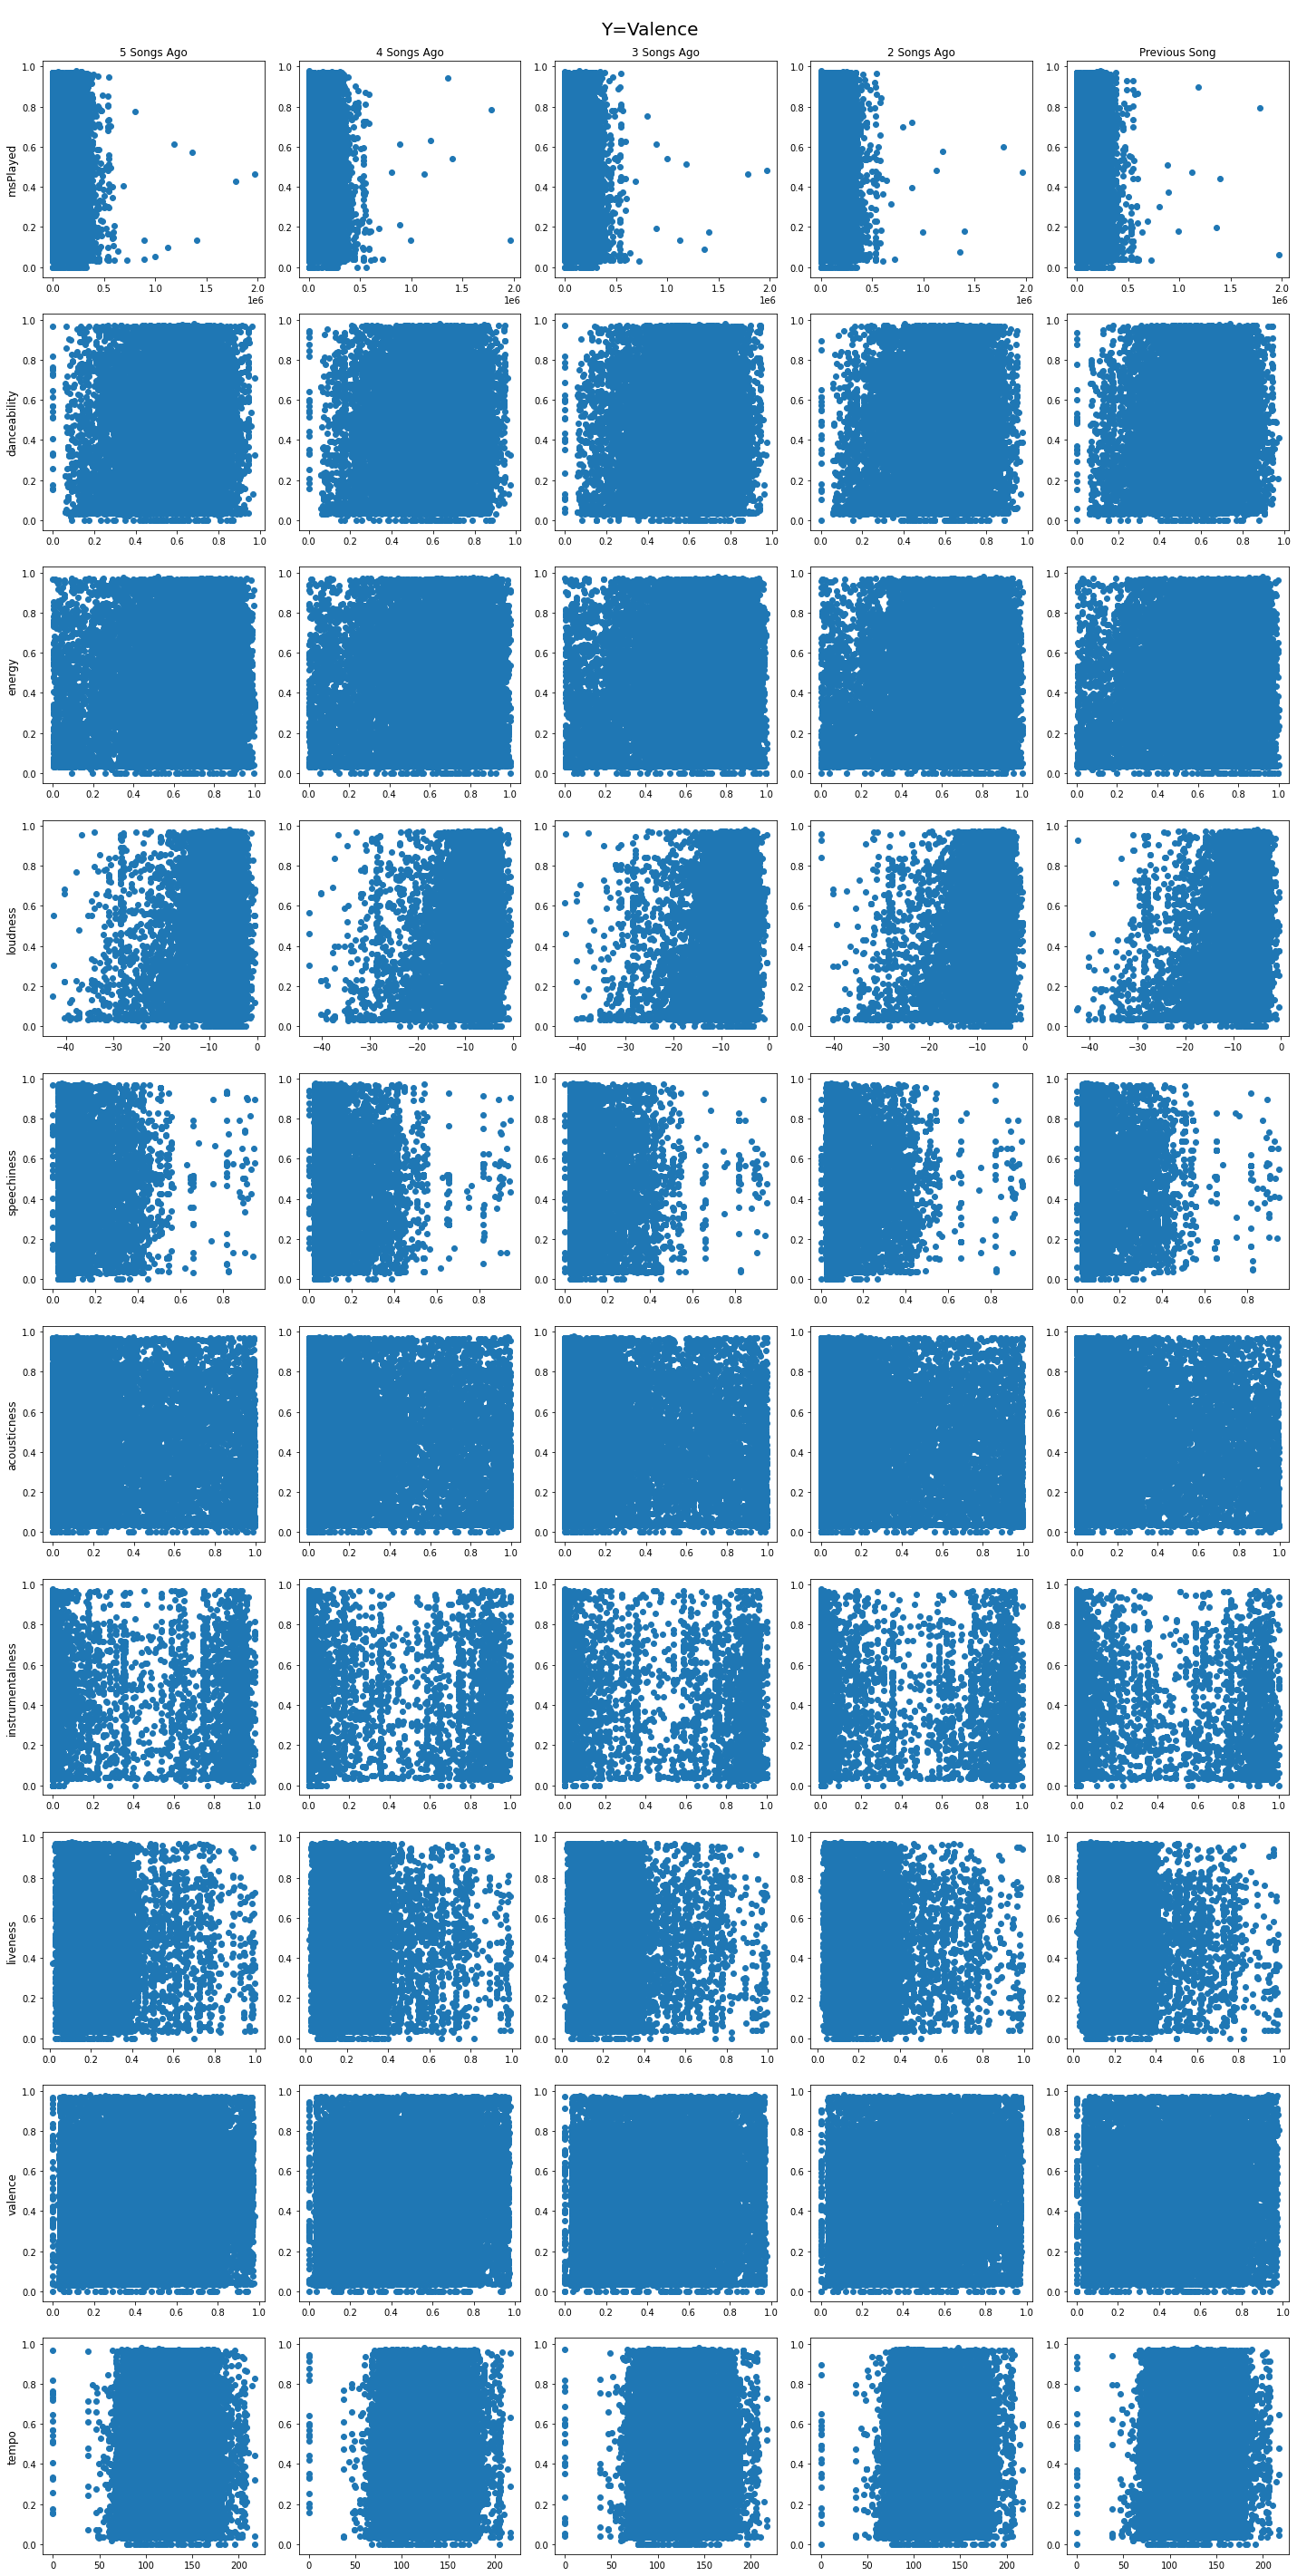

In [303]:
fig_graphs, fig_axes = plt.subplots(10,5, figsize=(20,40))
fig_axes[0,0].set_title("\n\n\n5 Songs Ago")
fig_axes[0,1].set_title("\n\n\n4 Songs Ago")
fig_axes[0,2].set_title("\n\n\n3 Songs Ago")
fig_axes[0,3].set_title("\n\n\n2 Songs Ago")
fig_axes[0,4].set_title("\n\n\nPrevious Song")
fig_axes[0,0].set_ylabel("msPlayed", size='large')
fig_axes[1,0].set_ylabel("danceability", size='large')
fig_axes[2,0].set_ylabel("energy", size='large')
fig_axes[3,0].set_ylabel("loudness", size='large')
fig_axes[4,0].set_ylabel("speechiness", size='large')
fig_axes[5,0].set_ylabel("acousticness", size='large')
fig_axes[6,0].set_ylabel("instrumentalness", size='large')
fig_axes[7,0].set_ylabel("liveness", size='large')
fig_axes[8,0].set_ylabel("valence", size='large')
fig_axes[9,0].set_ylabel("tempo", size='large')

for i in range(10):
    for j in range(5):
        fig_axes[i,j].scatter(last_five[input_cols[i] + "_" + str(j+1)],next_song["valence"])

plt.suptitle("Y=Valence",fontsize=20)
fig_graphs.tight_layout()

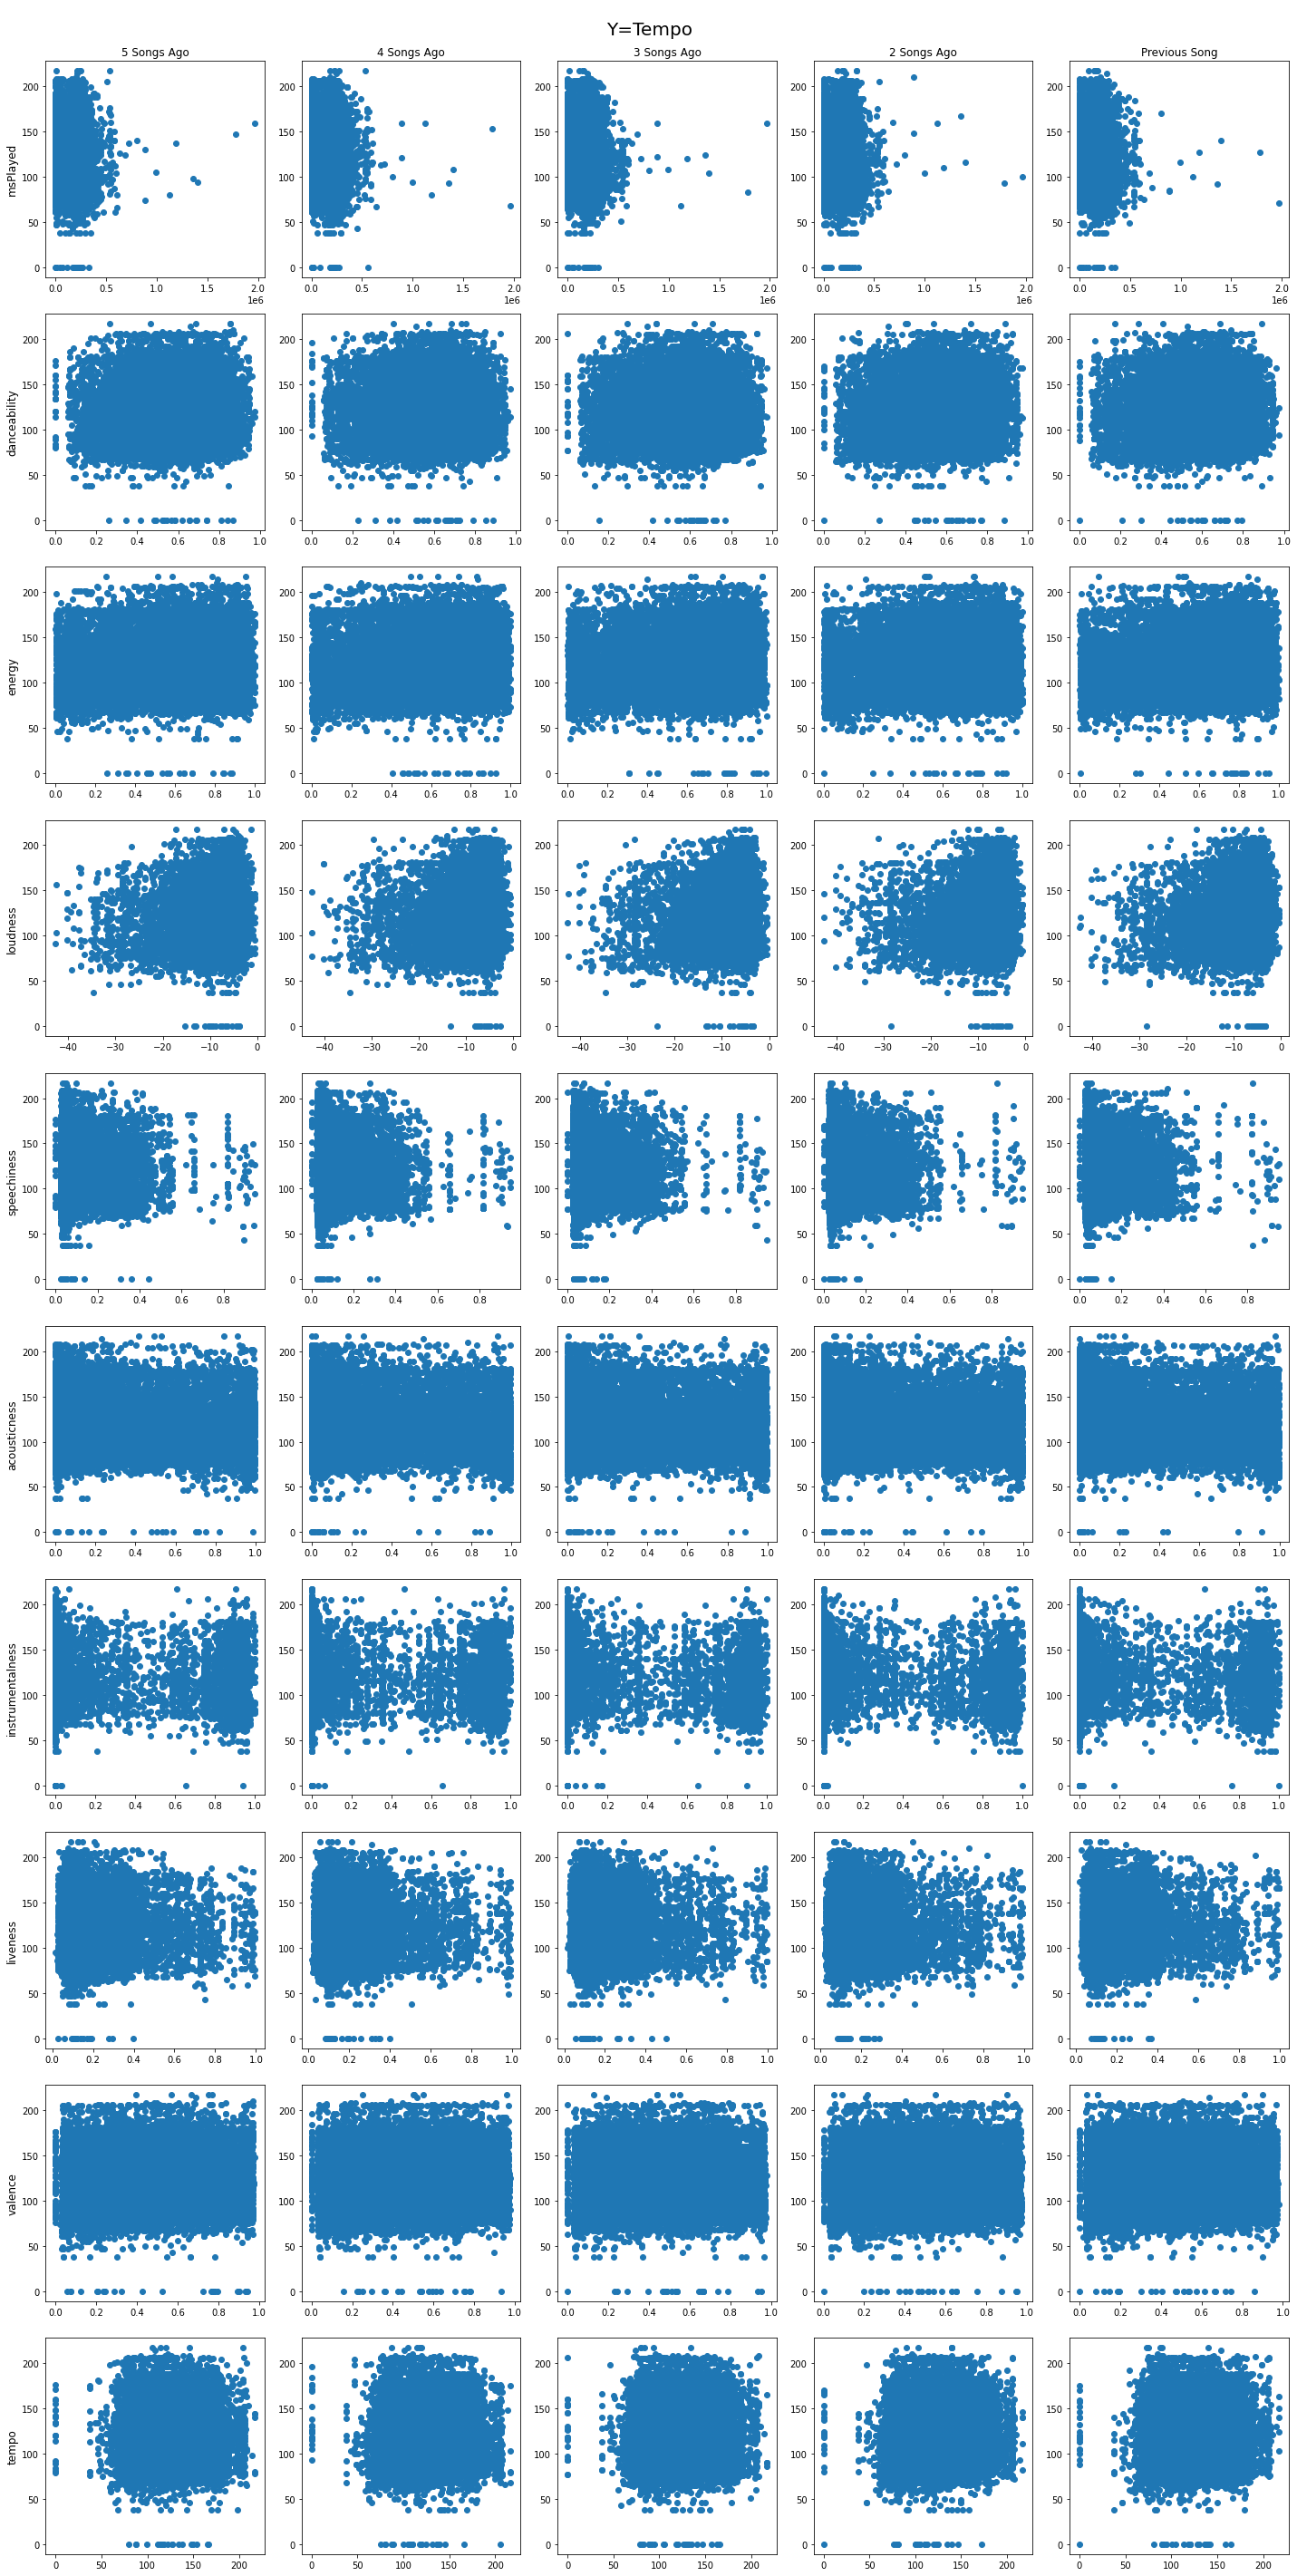

In [304]:
fig_graphs, fig_axes = plt.subplots(10,5, figsize=(20,40))
fig_axes[0,0].set_title("\n\n\n5 Songs Ago")
fig_axes[0,1].set_title("\n\n\n4 Songs Ago")
fig_axes[0,2].set_title("\n\n\n3 Songs Ago")
fig_axes[0,3].set_title("\n\n\n2 Songs Ago")
fig_axes[0,4].set_title("\n\n\nPrevious Song")
fig_axes[0,0].set_ylabel("msPlayed", size='large')
fig_axes[1,0].set_ylabel("danceability", size='large')
fig_axes[2,0].set_ylabel("energy", size='large')
fig_axes[3,0].set_ylabel("loudness", size='large')
fig_axes[4,0].set_ylabel("speechiness", size='large')
fig_axes[5,0].set_ylabel("acousticness", size='large')
fig_axes[6,0].set_ylabel("instrumentalness", size='large')
fig_axes[7,0].set_ylabel("liveness", size='large')
fig_axes[8,0].set_ylabel("valence", size='large')
fig_axes[9,0].set_ylabel("tempo", size='large')

for i in range(10):
    for j in range(5):
        fig_axes[i,j].scatter(last_five[input_cols[i] + "_" + str(j+1)],next_song["tempo"])

plt.suptitle("Y=Tempo",fontsize=20)
fig_graphs.tight_layout()

# Data Conclusions
---
It seems that the the only values that are remotely predictable are Liveliness, Speechiness, and Loudness. The rest are wholely unpredictable.